# CSCE 5380 Data Mining Final Project

# Title: Categorizing Car Insurance Claims: A Predictive Analysis Study

# Group 2:


Shashidhar Kalapatapu<br> (Team Representative) <br>
shashidharkalapatapu@my.unt.edu<br>
11545863<br>

Aditya Vadrevu<br>
adityavadrevu@my.unt.edu<br>
11601517<br>

Sai Teja Shaga<br>
saitejashaga@my.unt.edu <br>
11613473<br>

Meghana Vagdevi Korada<br>
meghanavagdevikorada@my.unt.edu <br>
11604477<br>

Gowtham Sai Lendhra Narayanam<br>
gowthamsailendhranarayanam@my.unt.edu <br>
11709752<br>

## Sections
* 1.[Importing Packages](#1)
* 2.[Dataset Loading](#2)
* 3.[Exploratory Data Analysis (EDA)](#3)
* 4.[Data Preprocessing](#4)
* 5.[Predictive Modeling](#5)
* 6.[Hyperparameter Tuning](#6)
* 7.[Conclusion](#7)


In [1]:
# run this is if you are running on colab
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


<a id="1"></a>
## 1. Importing Packages

Install these packages using pip command

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## 2. Dataset Loading

The dataset has been taken from the kaggle Car Insurance Claim dataset
<br>
https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification/data?select=train.csv

Few Points regarding the dataset:

1. <b>The Dataset contains 44 Columns and 58592 Rows<b>
    
2. The Dataset contains policyholder details such as policy tenure, age of the car, age of the car owner, the population density of the city, make and model of the car, power, engine type, etc, and the target variable (is_claim) indicating whether the policyholder files a claim in the next 6 months or not.

3. The last column <b>'is_claim' is the Target Variable. It's a binary data value - Whether the policyholder will file a claim in the next 6 months (0 - No , 1 - Yes)<b>

<br>

In [3]:
# Importing the train csv file

# the folder where the dataset and the project files reside

# for local paths, replace the path with the location of the train.csv file

# path = "C:/Users/admin/CSCE 5380 Data Mining Project/data/"
path = "/content/drive/MyDrive/car_insurance_data/"

# lets load the train dataset into a dataframe called 'df'.
df = pd.read_csv(path + "train.csv")

# the first 5 rows of the dataframe
df.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type  ... is_brake_assist  \
0                4990     1       A    M1       CNG  ...              No   
1               27003     1       A    M1       CNG  ...              No   
2                4076     1       A    M1       CNG  ...              No   
3               21622     1      C1    M2    Petrol  ...             Yes   
4               34738     2       A    M3    Petrol  ...              No   

  is_power_door_locks is_central_locking  is_power_steering  \
0                  No                 No                Yes   
1                  No                 No                Yes   
2                  No                 No                Yes   
3                 Yes                Yes                Yes   
4                 Yes                Yes                Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert ncap_rating is_claim  
0            Yes           0        0  
1            Yes           0        0  
2            Yes           0        0  
3            Yes           2        0  
4            Yes           2        0  

[5 rows x 44 columns]

<a id="3"></a>
## 3. Exploratory Data Analysis (EDA)

In [4]:
# Rows and Columns
df.shape

(58592, 44)

In [5]:
# Column Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [6]:
df.isna().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

### Observations
There are No Missing Values in the dataset

In [7]:
# Statistical Distribution of the attributes

df.describe().T

count          mean           std          min  \
policy_tenure        58592.0      0.611246      0.414156     0.002735   
age_of_car           58592.0      0.069424      0.056721     0.000000   
age_of_policyholder  58592.0      0.469420      0.122886     0.288462   
population_density   58592.0  18826.858667  17660.174792   290.000000   
make                 58592.0      1.763722      1.136988     1.000000   
airbags              58592.0      3.137066      1.832641     1.000000   
displacement         58592.0   1162.355851    266.304786   796.000000   
cylinder             58592.0      3.626963      0.483616     3.000000   
gear_box             58592.0      5.245443      0.430353     5.000000   
turning_radius       58592.0      4.852893      0.228061     4.500000   
length               58592.0   3850.476891    311.457119  3445.000000   
width                58592.0   1672.233667    112.089135  1475.000000   
height               58592.0   1553.335370     79.622270  1475.000000   
gross_weight         58592.0   1385.276813    212.423085  1051.000000   
ncap_rating          58592.0      1.759950      1.389576     0.000000   
is_claim             58592.0      0.063968      0.244698     0.000000   

                             25%          50%           75%           max  
policy_tenure           0.210250     0.573792      1.039104      1.396641  
age_of_car              0.020000     0.060000      0.110000      1.000000  
age_of_policyholder     0.365385     0.451923      0.548077      1.000000  
population_density   6112.000000  8794.000000  27003.000000  73430.000000  
make                    1.000000     1.000000      3.000000      5.000000  
airbags                 2.000000     2.000000      6.000000      6.000000  
displacement          796.000000  1197.000000   1493.000000   1498.000000  
cylinder                3.000000     4.000000      4.000000      4.000000  
gear_box                5.000000     5.000000      5.000000      6.000000  
turning_radius          4.600000     4.800000      5.000000      5.200000  
length               3445.000000  3845.000000   3995.000000   4300.000000  
width                1515.000000  1735.000000   1755.000000   1811.000000  
height               1475.000000  1530.000000   1635.000000   1825.000000  
gross_weight         1185.000000  1335.000000   1510.000000   1720.000000  
ncap_rating             0.000000     2.000000      3.000000      5.000000  
is_claim                0.000000     0.000000      0.000000      1.000000

### Observations
For population_density, there's a noticeably large difference between the 75% percentile and the max value
It could indicate the possibility of outliers.

Unique values of is_claim:  [0 1]
---------------------------


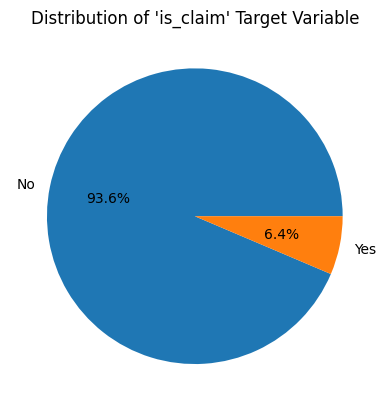

In [8]:
# Target Variable

print("Unique values of is_claim: ", df.is_claim.unique())

print("---------------------------")
target_spread = df.is_claim.value_counts()

fig, ax = plt.subplots()
plt.title("Distribution of 'is_claim' Target Variable")
ax.pie(target_spread.values, labels= ["No", "Yes"], autopct='%1.1f%%')

fig.show()

Only 6.4% of the policyholders filed an Insurance claim within 6 months.

In [9]:
# Unique Values

df.nunique()

policy_id                           58592
policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [10]:
# Policy Id and Policy Tenure don't offer any useful information if all values are unique.
# Dropping these columns,
df.drop(['policy_id', 'policy_tenure'], axis= 1, inplace= True)
df.head()

age_of_car  age_of_policyholder area_cluster  population_density  make  \
0        0.05             0.644231           C1                4990     1   
1        0.02             0.375000           C2               27003     1   
2        0.02             0.384615           C3                4076     1   
3        0.11             0.432692           C4               21622     1   
4        0.11             0.634615           C5               34738     2   

  segment model fuel_type     max_torque         max_power  ...  \
0       A    M1       CNG   60Nm@3500rpm  40.36bhp@6000rpm  ...   
1       A    M1       CNG   60Nm@3500rpm  40.36bhp@6000rpm  ...   
2       A    M1       CNG   60Nm@3500rpm  40.36bhp@6000rpm  ...   
3      C1    M2    Petrol  113Nm@4400rpm  88.50bhp@6000rpm  ...   
4       A    M3    Petrol   91Nm@4250rpm  67.06bhp@5500rpm  ...   

  is_brake_assist  is_power_door_locks is_central_locking is_power_steering  \
0              No                   No                 No               Yes   
1              No                   No                 No               Yes   
2              No                   No                 No               Yes   
3             Yes                  Yes                Yes               Yes   
4              No                  Yes                Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert  ncap_rating  is_claim  
0            Yes            0         0  
1            Yes            0         0  
2            Yes            0         0  
3            Yes            2         0  
4            Yes            2         0  

[5 rows x 42 columns]

In [11]:
# Let's seperate the Categorical and Numerical attributes for more detailed analysis

cat_cols=[]
num_cols=[]

for i in df.columns:
    total_unique_vals = len(df[i].unique())

    if total_unique_vals < 15:
        cat_cols.append(i)

    else:
        num_cols.append(i)


In [12]:
print(num_cols)

['age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density']


In [13]:
print(cat_cols)

['make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim']


In [14]:
df.loc[:, num_cols]

age_of_car  age_of_policyholder area_cluster  population_density
0            0.05             0.644231           C1                4990
1            0.02             0.375000           C2               27003
2            0.02             0.384615           C3                4076
3            0.11             0.432692           C4               21622
4            0.11             0.634615           C5               34738
...           ...                  ...          ...                 ...
58587        0.13             0.644231           C8                8794
58588        0.02             0.519231          C14                7788
58589        0.05             0.451923           C5               34738
58590        0.14             0.557692           C8                8794
58591        0.02             0.442308           C8                8794

[58592 rows x 4 columns]

In [15]:
# area_cluster is not a numerical variable, add it to the categorical columns list.

num_cols.remove('area_cluster')
cat_cols.append('area_cluster')

In [16]:
df.loc[:, num_cols].head()

age_of_car  age_of_policyholder  population_density
0        0.05             0.644231                4990
1        0.02             0.375000               27003
2        0.02             0.384615                4076
3        0.11             0.432692               21622
4        0.11             0.634615               34738

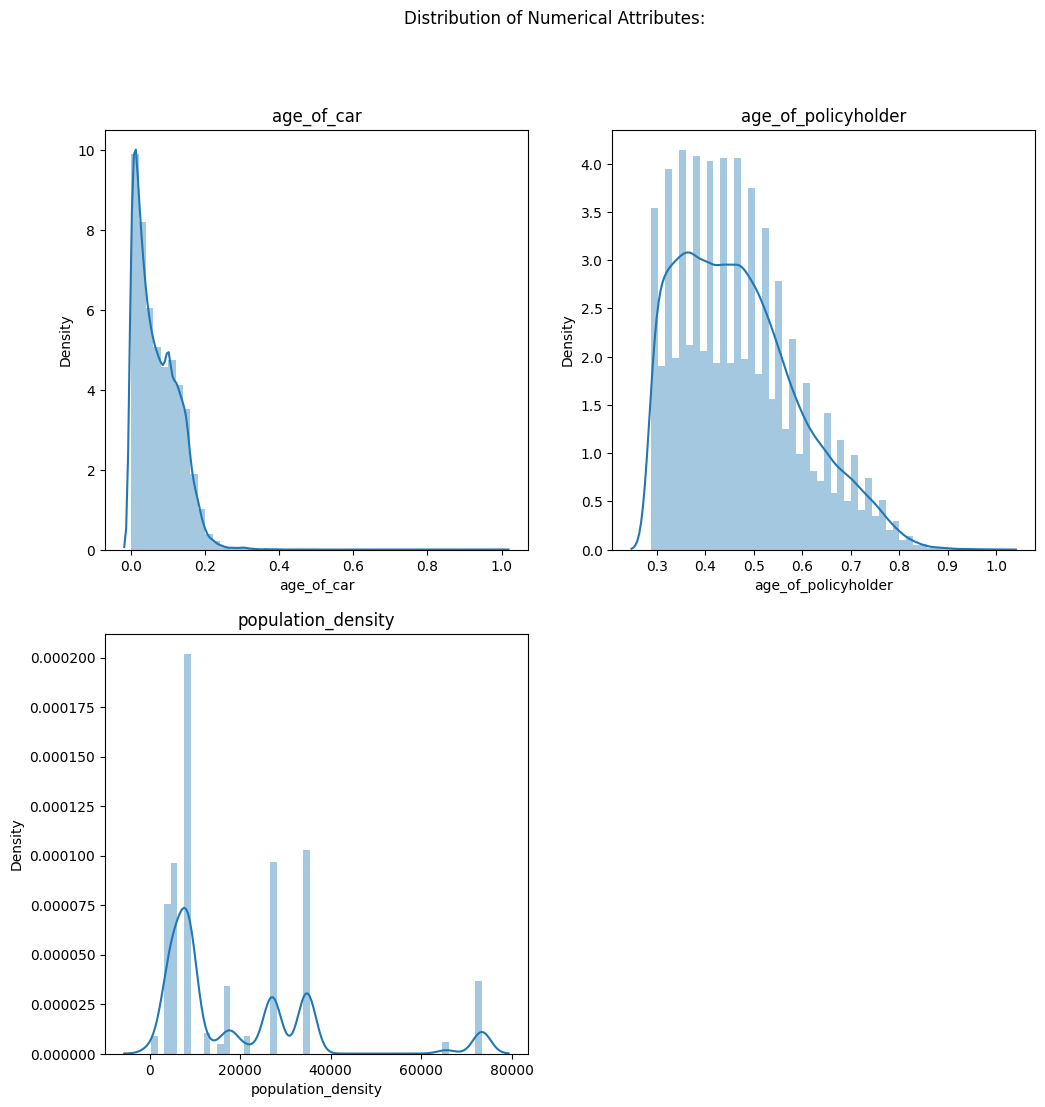

In [17]:
# Visualizing the distribution of Numerical Variables
plt.figure(figsize= (12, 12))
plt.suptitle("Distribution of Numerical Attributes:")

j = 1
for i in df.loc[:, num_cols]:
    plt.subplot(2, 2, j)
    sns.distplot(df[i])
    plt.title(i)
    j += 1

### Observations
<br>
1. The age_of_car column is heavily skewed to right. This implies that the majority of the cars are quite new and their age is less than 2-3 years.
<br><br>
2. The Age_of_policyholder is skewed to right as well. Possibly indicating that the most of the policyholders are in their teenage to mid 30 years.
<br><br>
3. The population densities have different peaks, Highest peaks indicating the most populated cities where the policyholders are from.
<br><br>

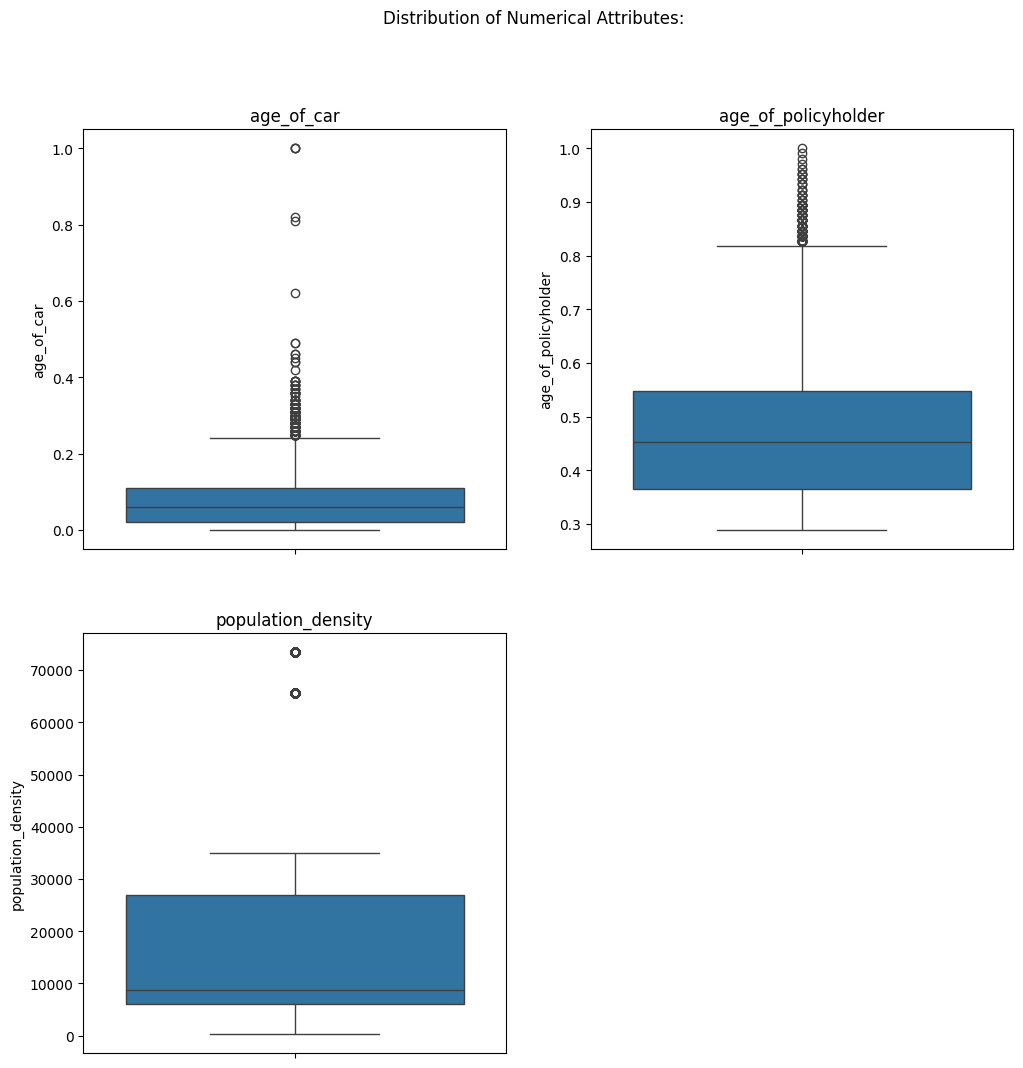

In [18]:
# Outlier Analysis

plt.figure(figsize= (12, 12))
plt.suptitle("Distribution of Numerical Attributes:")

j = 1
for i in df.loc[:, num_cols]:
    plt.subplot(2, 2, j)
    sns.boxplot(df[i])
    plt.title(i)
    j += 1

### Observations
<br>
1. For the age of car, there are quite a lot of outliers, however, as the data is also heavily right skewed, we can't discard all the outliers. Let's set the threshold as 0.6 for age_of_car and drop the age greater than 0.6, then we re-normalize the data with 0.6 as the maximum.
<br><br>
2. For the age_of_policyholder, the outliers are not that distant from the max. So, we will not drop them.
<br><br>
3. For the population_density, the data as seen before is not normalized. So no need to remove outliers here, we will simply normalize it.


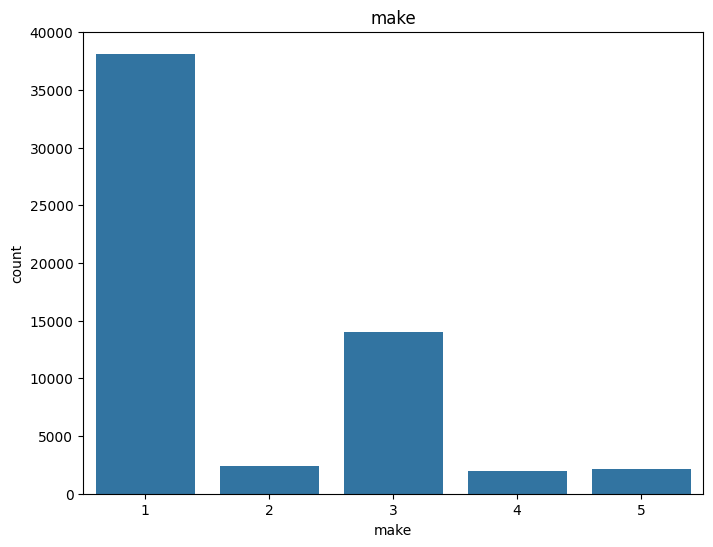

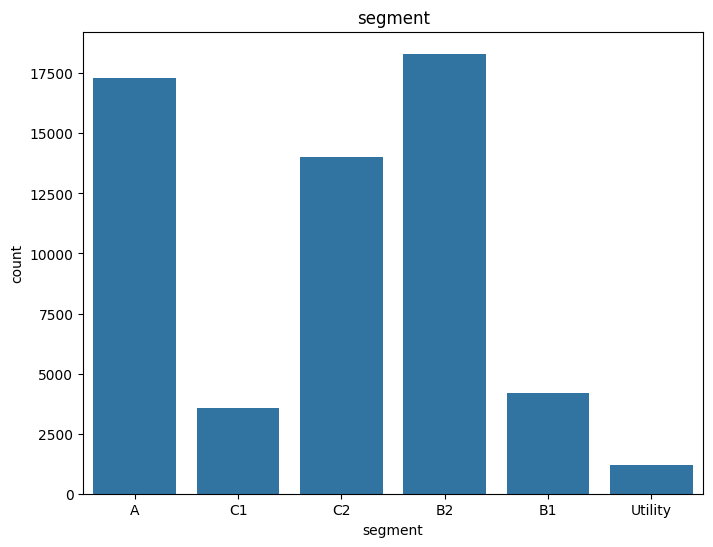

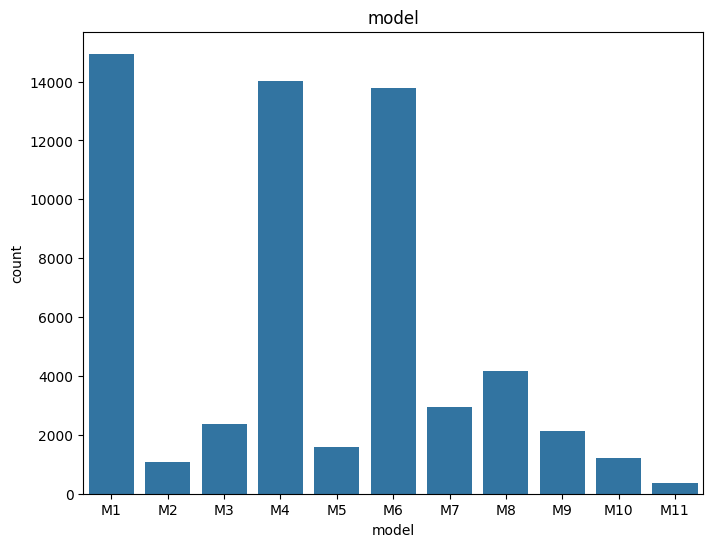

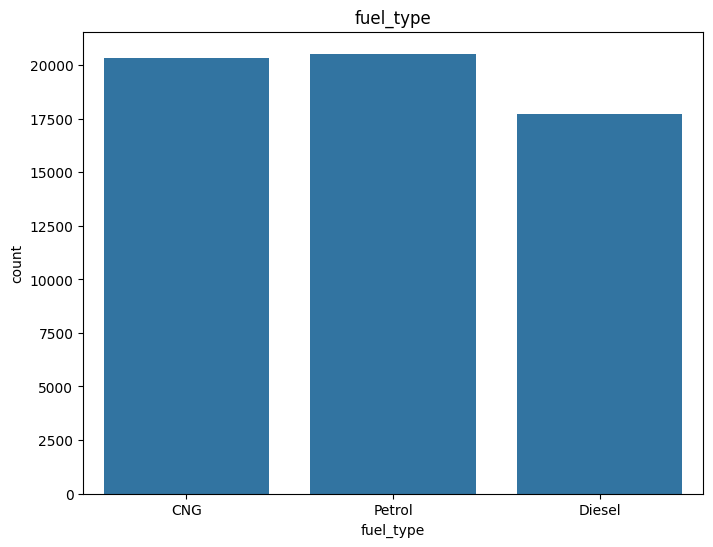

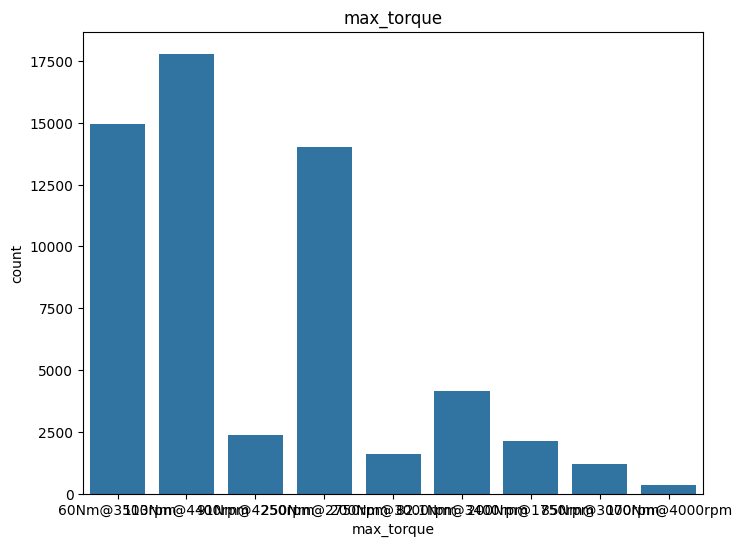

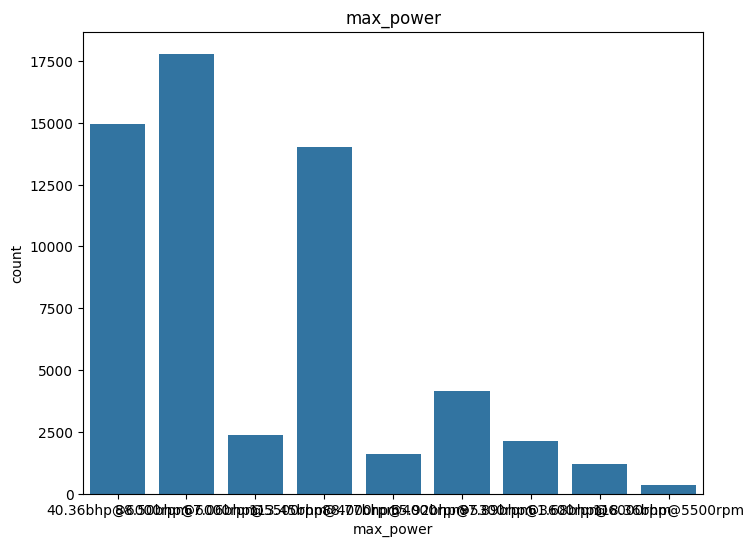

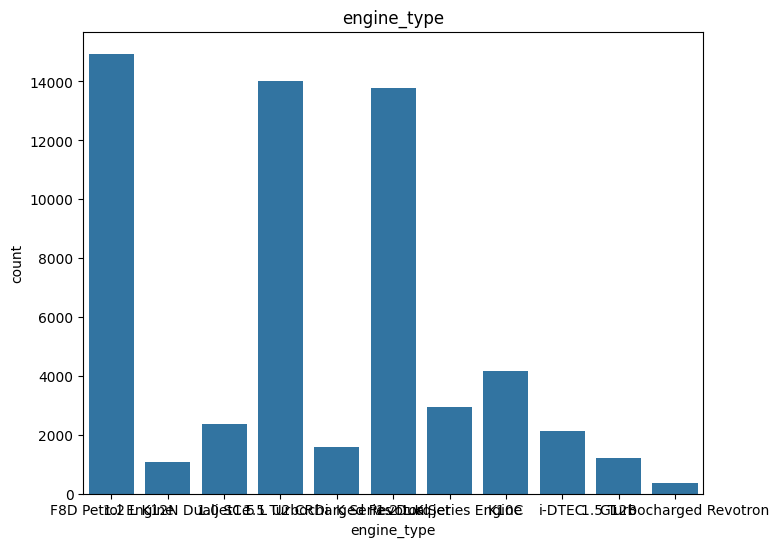

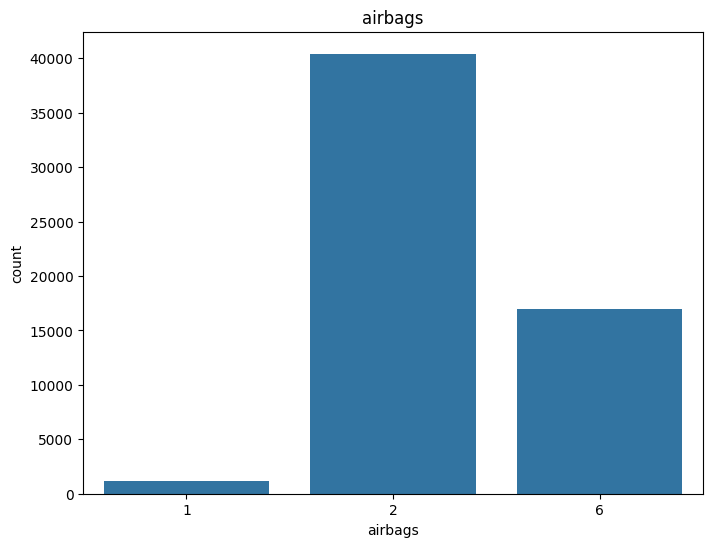

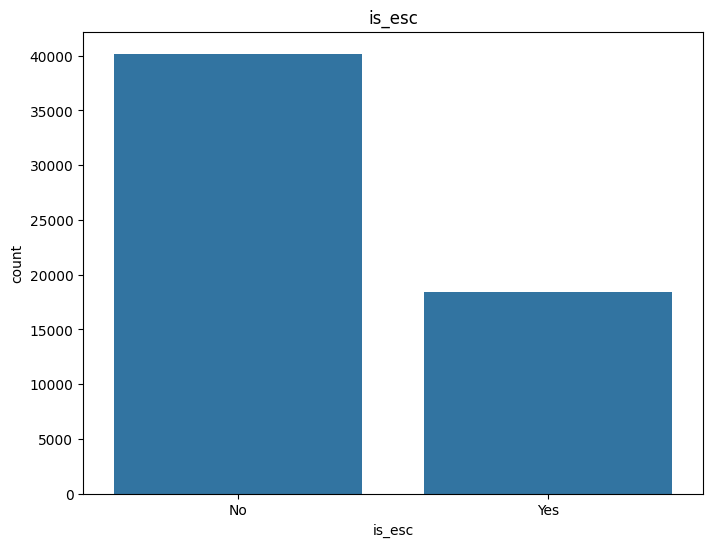

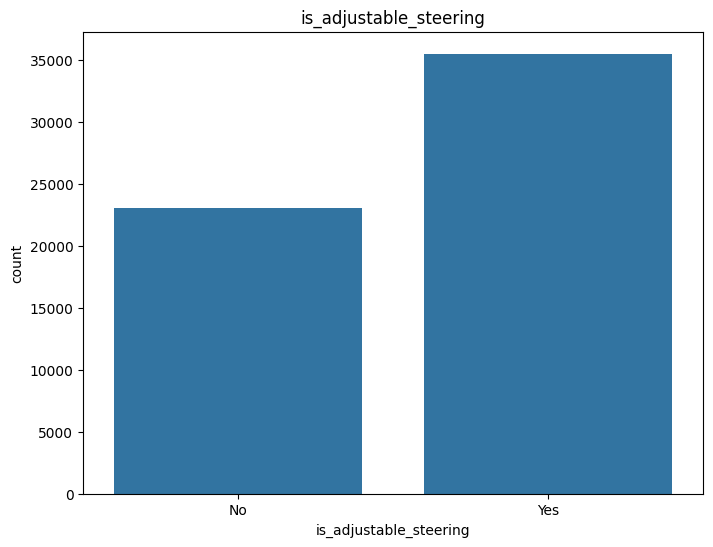

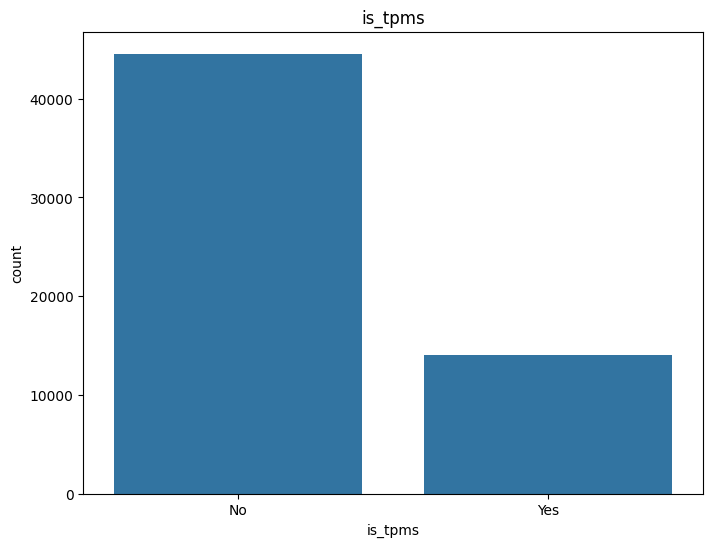

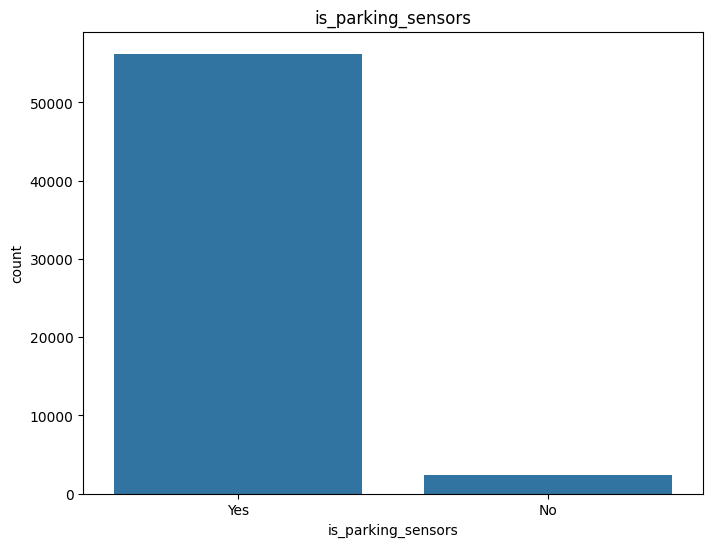

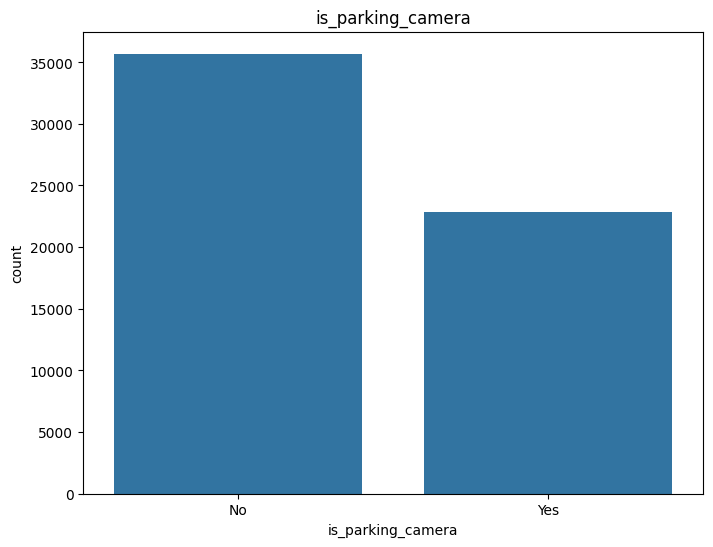

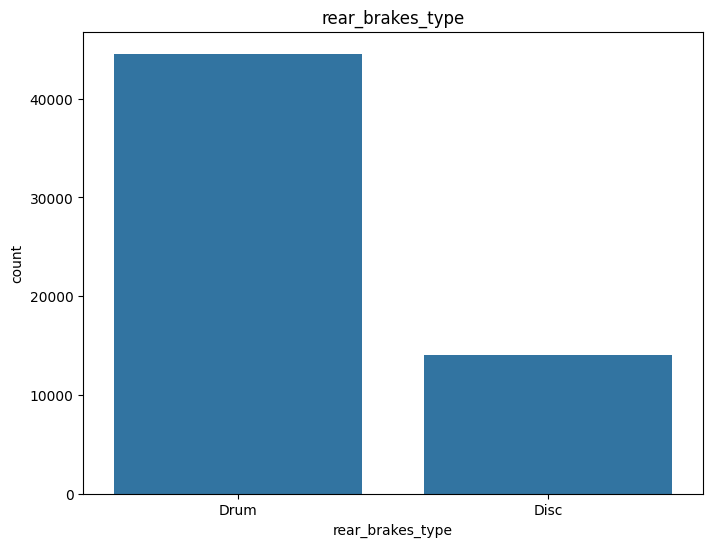

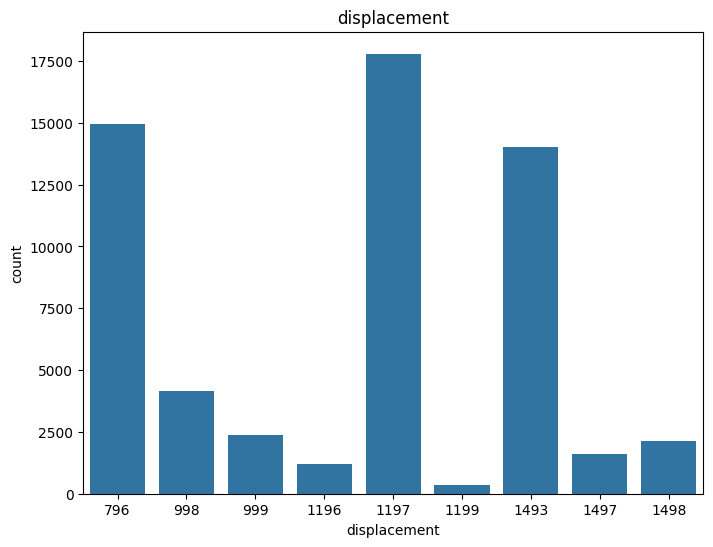

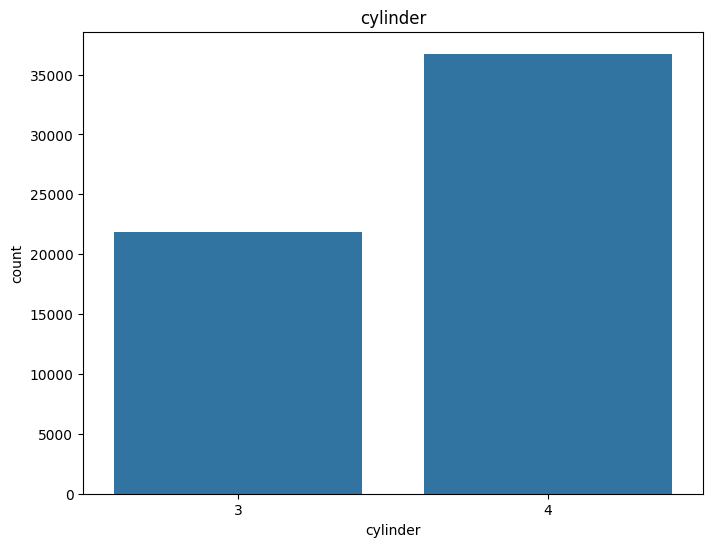

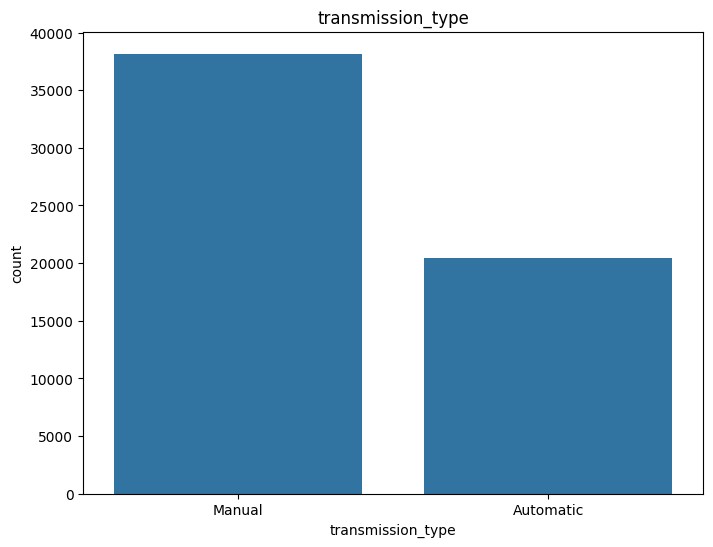

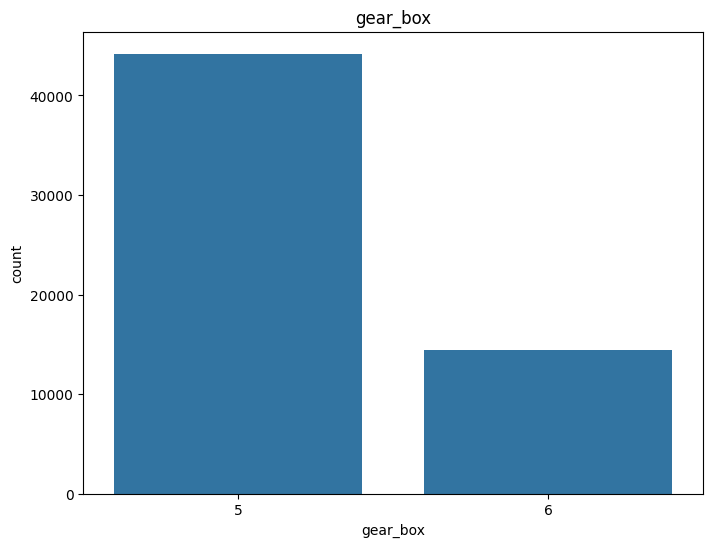

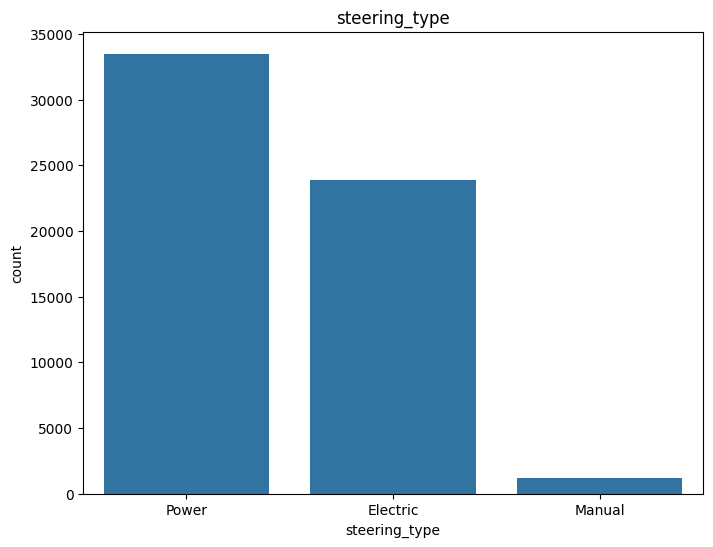

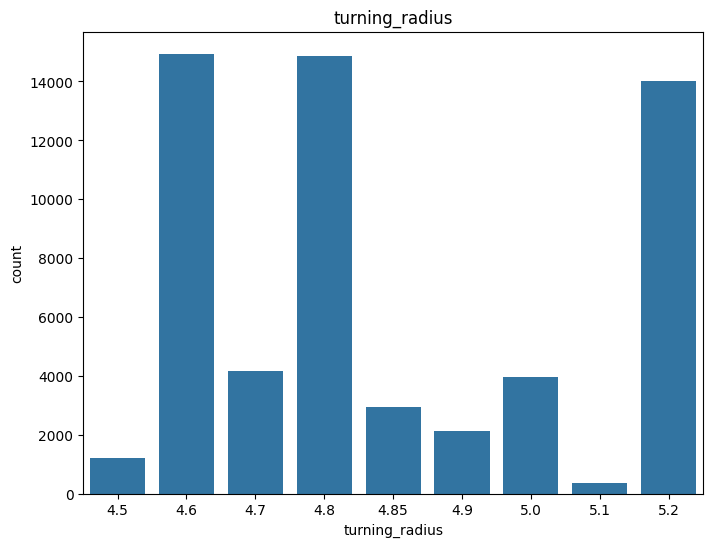

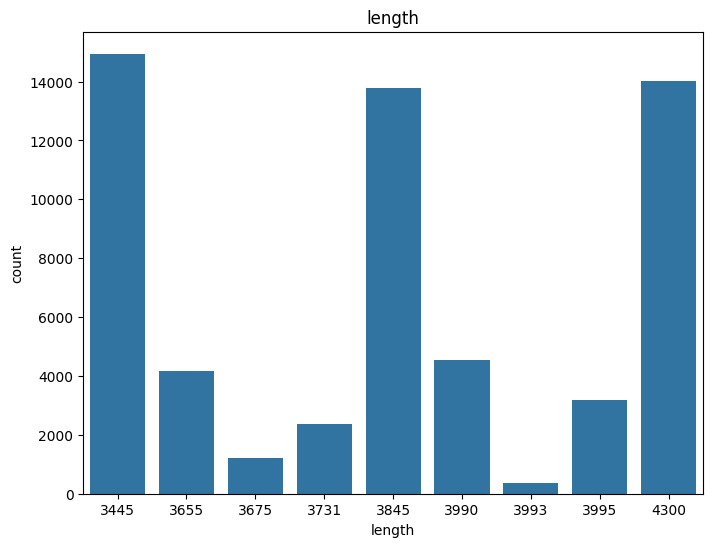

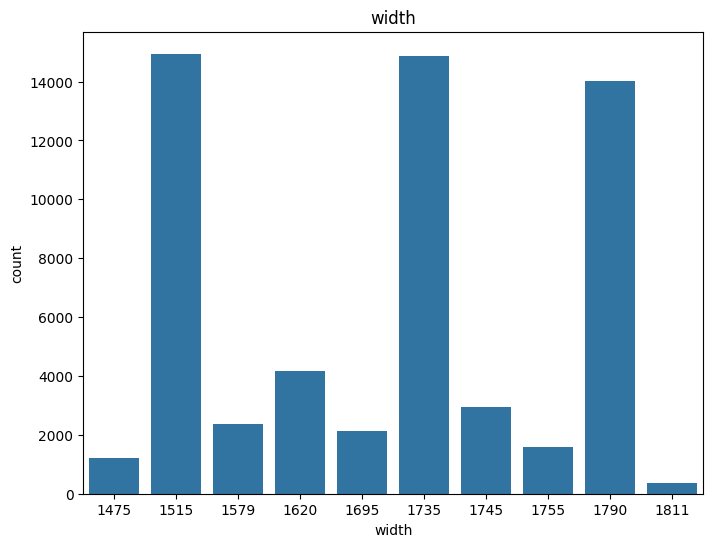

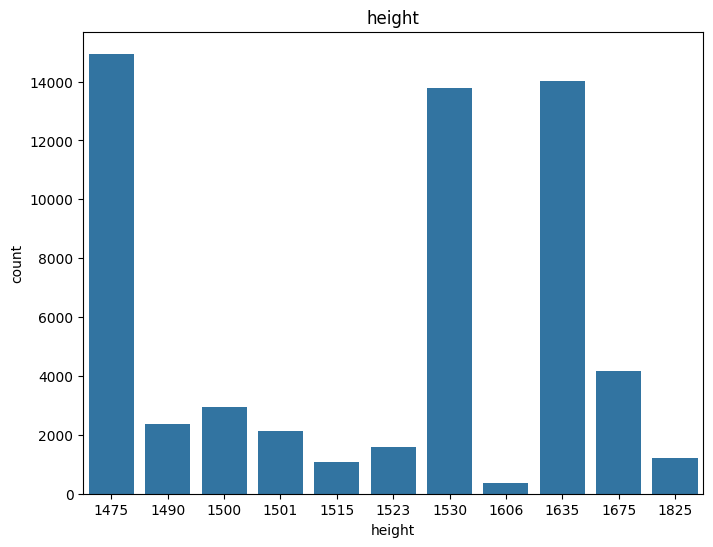

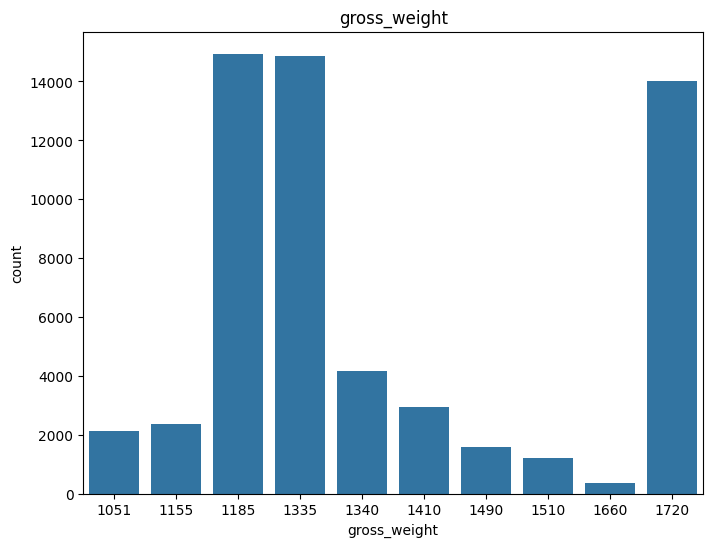

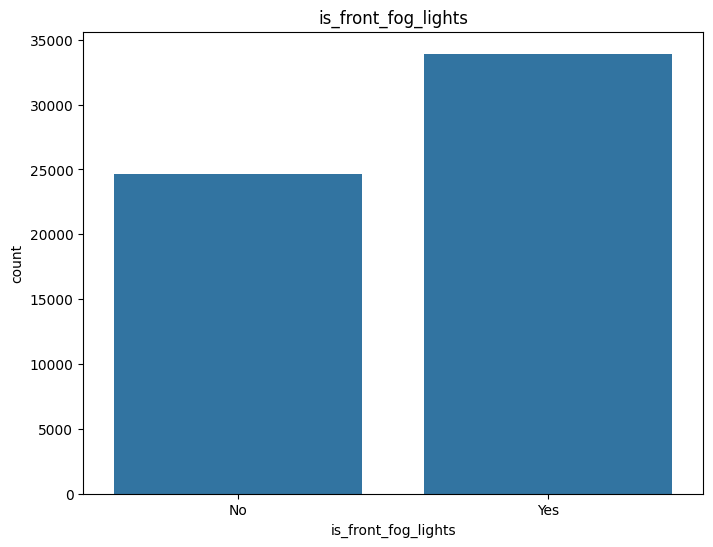

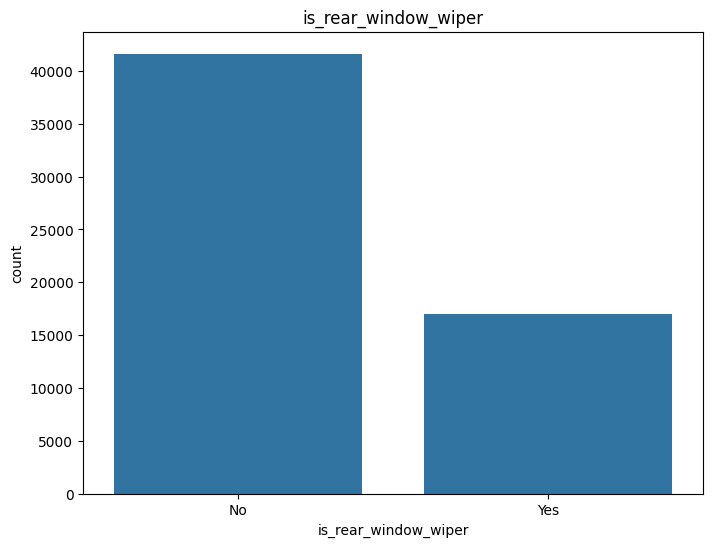

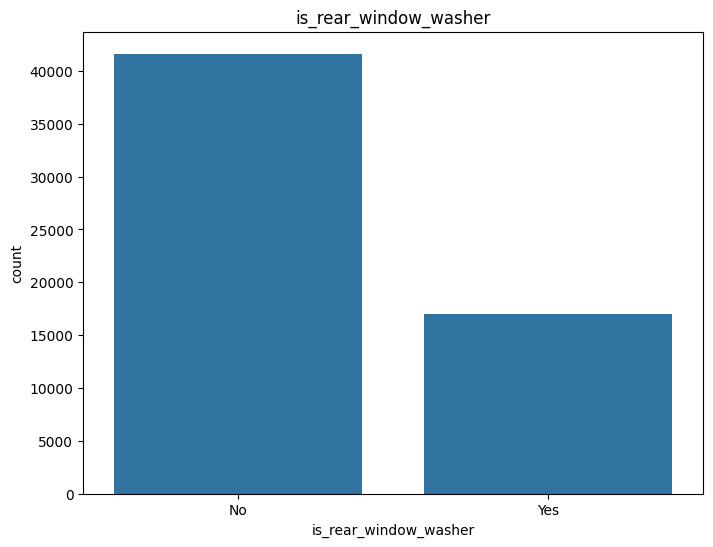

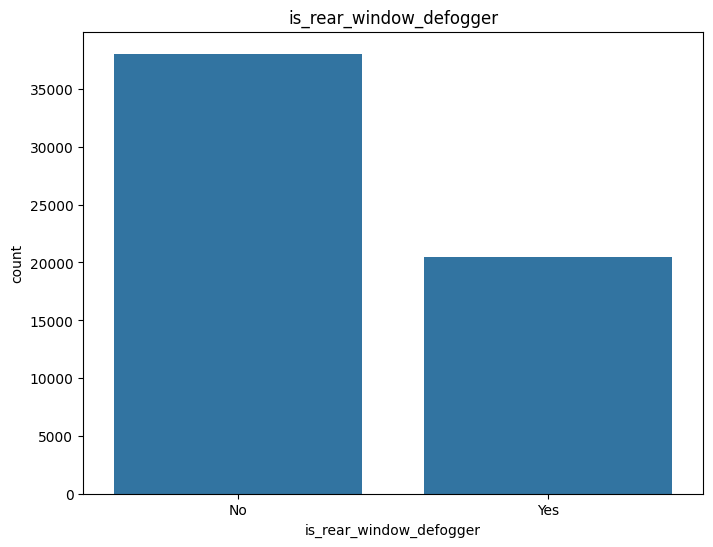

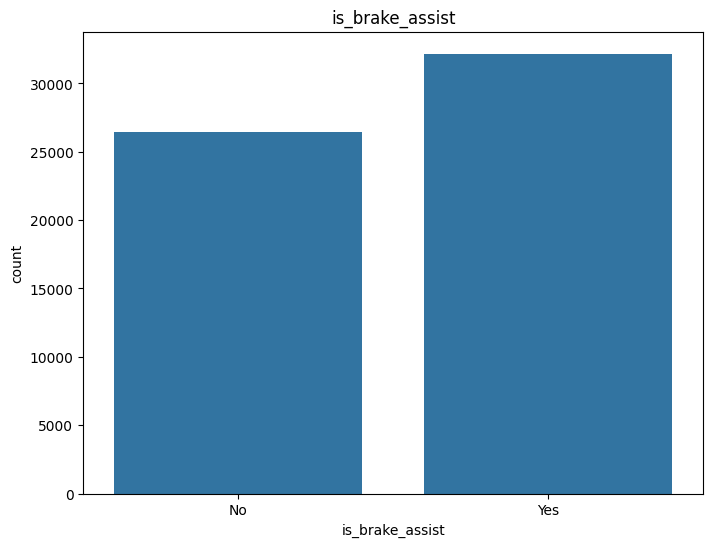

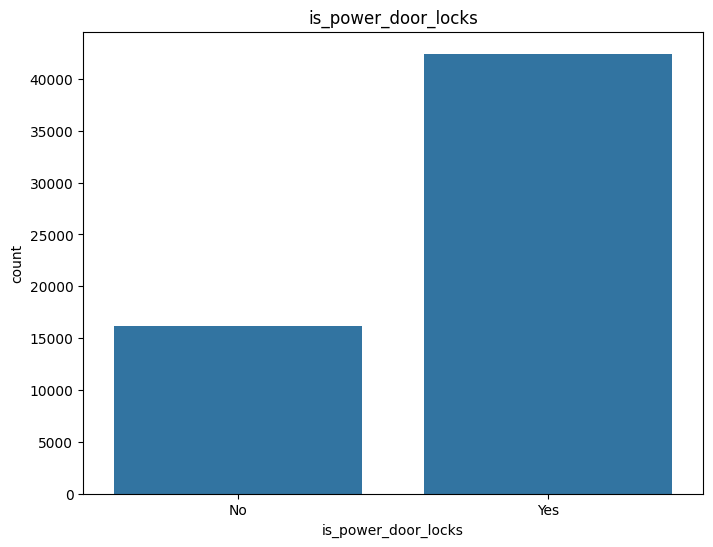

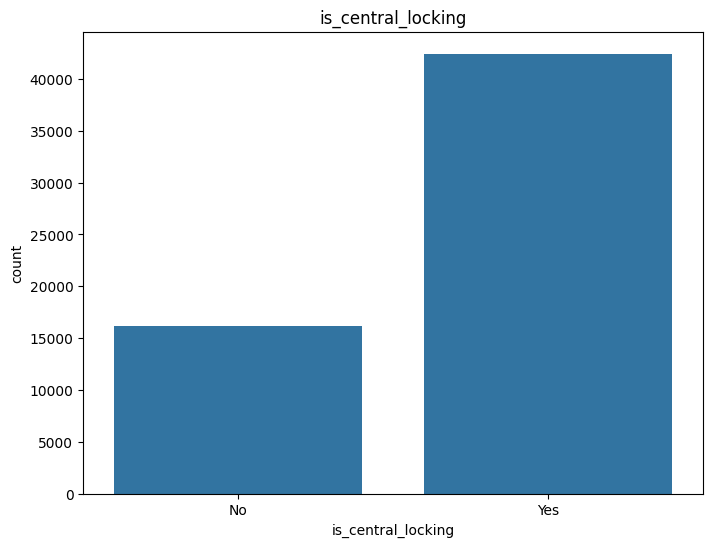

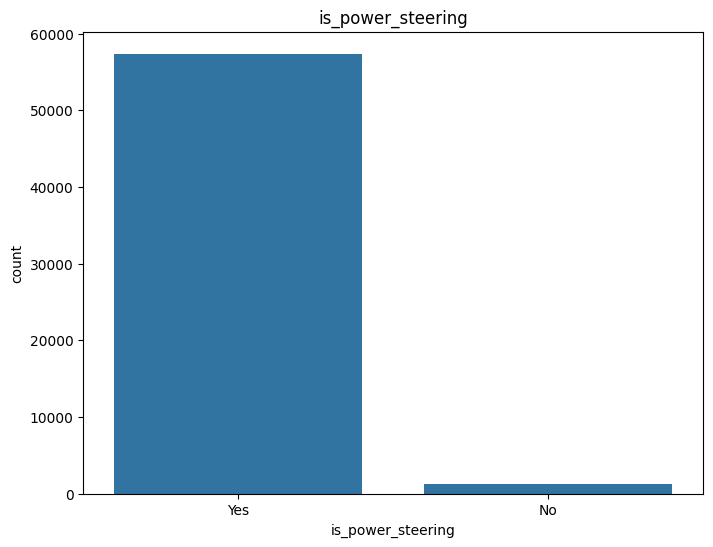

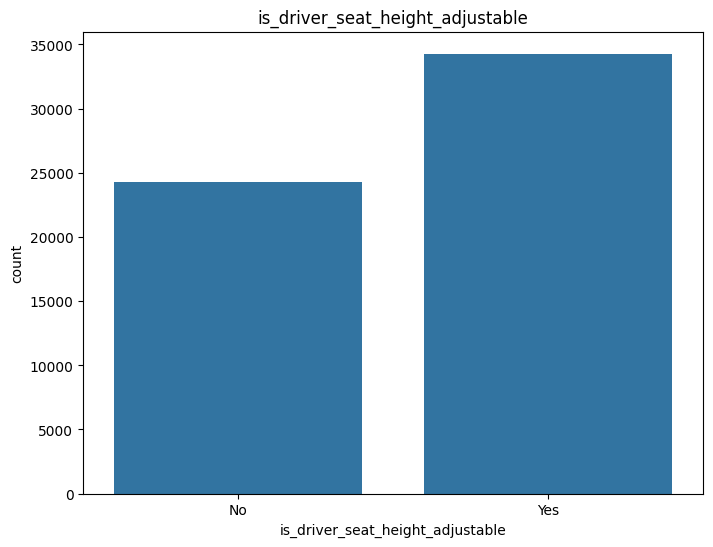

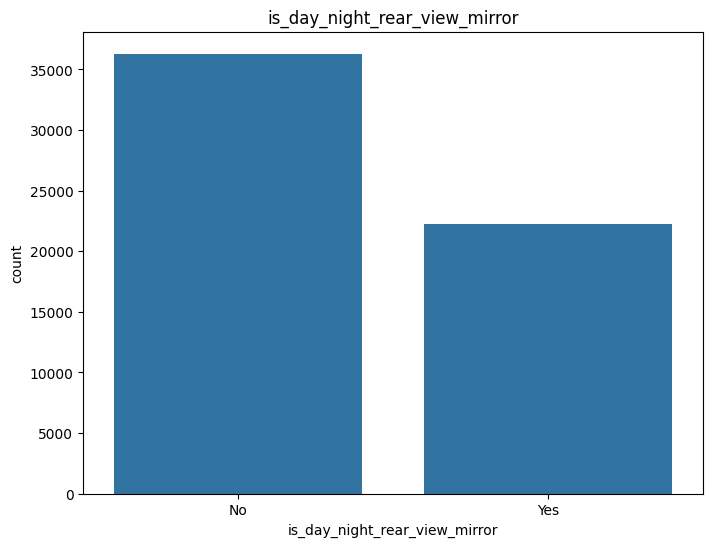

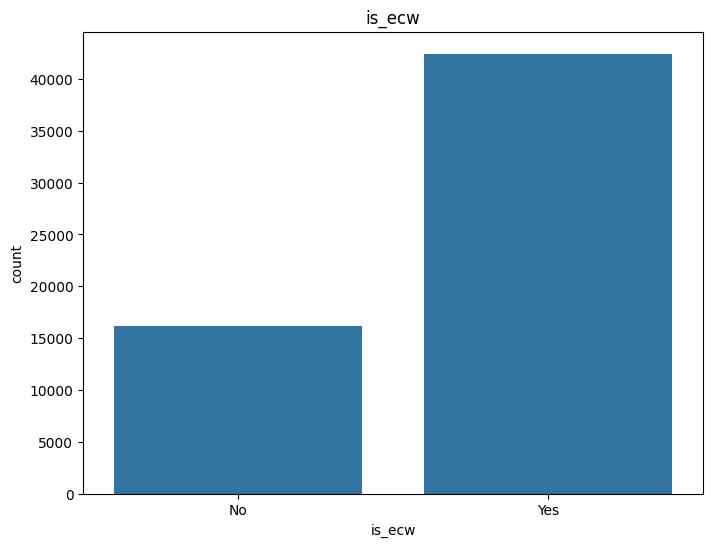

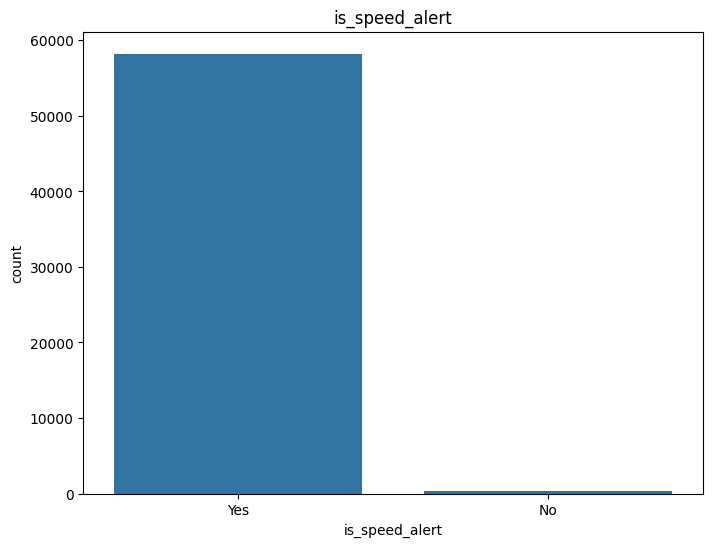

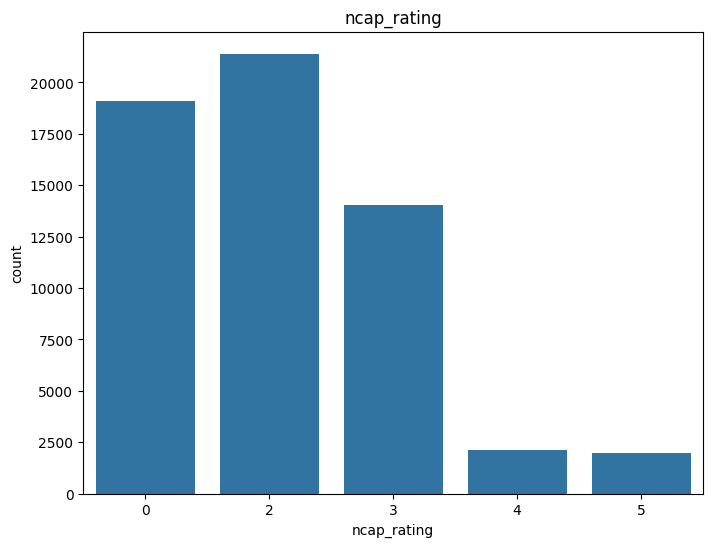

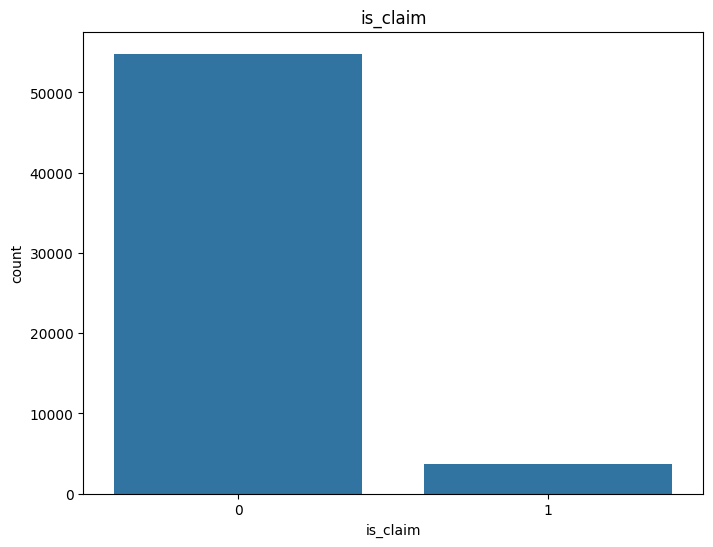

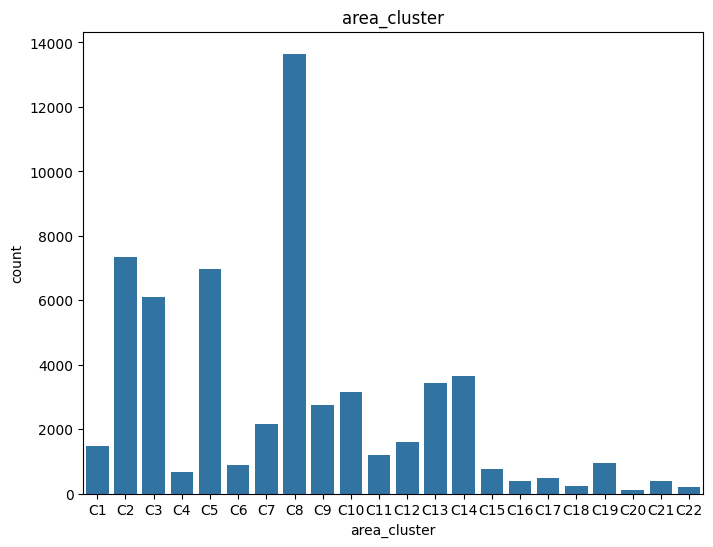

In [19]:
# categorical Analysis;

for i in cat_cols:

    plt.figure(figsize=(8,6))
    sns.countplot(x=i,data=df.loc[:,cat_cols])
    plt.title(i)

### Observations
Some columns have numerical data written inside strings, we will need to process this data

<a id="4"></a>
## 4. Data Preprocessing

### Handling Outliers and Normalizing Data

In [20]:
age_car_outlier_threshold = 0.6

# Filtering and dropping the rows of age_of_car
df = df[df['age_of_car'] <= age_car_outlier_threshold]

# Normalizing the age_of_car column with outlier threshold as the new maximum
df['age_of_car'] = df['age_of_car'] / age_car_outlier_threshold

df

age_of_car  age_of_policyholder area_cluster  population_density  make  \
0        0.083333             0.644231           C1                4990     1   
1        0.033333             0.375000           C2               27003     1   
2        0.033333             0.384615           C3                4076     1   
3        0.183333             0.432692           C4               21622     1   
4        0.183333             0.634615           C5               34738     2   
...           ...                  ...          ...                 ...   ...   
58587    0.216667             0.644231           C8                8794     2   
58588    0.033333             0.519231          C14                7788     1   
58589    0.083333             0.451923           C5               34738     1   
58590    0.233333             0.557692           C8                8794     1   
58591    0.033333             0.442308           C8                8794     3   

      segment model fuel_type     max_torque          max_power  ...  \
0           A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm  ...   
1           A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm  ...   
2           A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm  ...   
3          C1    M2    Petrol  113Nm@4400rpm   88.50bhp@6000rpm  ...   
4           A    M3    Petrol   91Nm@4250rpm   67.06bhp@5500rpm  ...   
...       ...   ...       ...            ...                ...  ...   
58587       A    M3    Petrol   91Nm@4250rpm   67.06bhp@5500rpm  ...   
58588       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm  ...   
58589       A    M1       CNG   60Nm@3500rpm   40.36bhp@6000rpm  ...   
58590      B2    M6    Petrol  113Nm@4400rpm   88.50bhp@6000rpm  ...   
58591      C2    M4    Diesel  250Nm@2750rpm  113.45bhp@4000rpm  ...   

      is_brake_assist  is_power_door_locks is_central_locking  \
0                  No                   No                 No   
1                  No                   No                 No   
2                  No                   No                 No   
3                 Yes                  Yes                Yes   
4                  No                  Yes                Yes   
...               ...                  ...                ...   
58587              No                  Yes                Yes   
58588              No                   No                 No   
58589              No                   No                 No   
58590             Yes                  Yes                Yes   
58591             Yes                  Yes                Yes   

      is_power_steering is_driver_seat_height_adjustable  \
0                   Yes                               No   
1                   Yes                               No   
2                   Yes                               No   
3                   Yes                              Yes   
4                   Yes                               No   
...                 ...                              ...   
58587               Yes                               No   
58588               Yes                               No   
58589               Yes                               No   
58590               Yes                              Yes   
58591               Yes                              Yes   

      is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  \
0                                No     No            Yes            0   
1                                No     No            Yes            0   
2                                No     No            Yes            0   
3                               Yes    Yes            Yes            2   
4                               Yes    Yes            Yes            2   
...                             ...    ...            ...          ...   
58587                           Yes    Yes            Yes            2   
58588                            No     No            Yes            0   
5

In [21]:
# Normalize Population_density
max_density = df['population_density'].max()
min_density = df['population_density'].min()

diff = max_density - min_density

df['population_density'] = (df['population_density'] - min_density) / diff

df.head()

age_of_car  age_of_policyholder area_cluster  population_density  make  \
0    0.083333             0.644231           C1            0.064260     1   
1    0.033333             0.375000           C2            0.365231     1   
2    0.033333             0.384615           C3            0.051764     1   
3    0.183333             0.432692           C4            0.291660     1   
4    0.183333             0.634615           C5            0.470987     2   

  segment model fuel_type     max_torque         max_power  ...  \
0       A    M1       CNG   60Nm@3500rpm  40.36bhp@6000rpm  ...   
1       A    M1       CNG   60Nm@3500rpm  40.36bhp@6000rpm  ...   
2       A    M1       CNG   60Nm@3500rpm  40.36bhp@6000rpm  ...   
3      C1    M2    Petrol  113Nm@4400rpm  88.50bhp@6000rpm  ...   
4       A    M3    Petrol   91Nm@4250rpm  67.06bhp@5500rpm  ...   

  is_brake_assist  is_power_door_locks is_central_locking is_power_steering  \
0              No                   No                 No               Yes   
1              No                   No                 No               Yes   
2              No                   No                 No               Yes   
3             Yes                  Yes                Yes               Yes   
4              No                  Yes                Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert  ncap_rating  is_claim  
0            Yes            0         0  
1            Yes            0         0  
2            Yes            0         0  
3            Yes            2         0  
4            Yes            2         0  

[5 rows x 42 columns]

### Processing Max torque column into numerical columns

In [22]:
df['max_torque'].unique()

array(['60Nm@3500rpm', '113Nm@4400rpm', '91Nm@4250rpm', '250Nm@2750rpm',
       '200Nm@3000rpm', '82.1Nm@3400rpm', '200Nm@1750rpm', '85Nm@3000rpm',
       '170Nm@4000rpm'], dtype=object)

In [23]:
# On train dataset
df[['max_torque_Nm', 'max_torque_rpm']] = df['max_torque'].str.split('@', expand=True)

df['max_torque_Nm'] = df['max_torque_Nm'].str.extract(r'(\d+\.?\d*)').astype(float)
df['max_torque_rpm'] = df['max_torque_rpm'].str.extract(r'(\d+)').astype(int)

df.drop(columns=['max_torque'], inplace=True)

df.head()

age_of_car  age_of_policyholder area_cluster  population_density  make  \
0    0.083333             0.644231           C1            0.064260     1   
1    0.033333             0.375000           C2            0.365231     1   
2    0.033333             0.384615           C3            0.051764     1   
3    0.183333             0.432692           C4            0.291660     1   
4    0.183333             0.634615           C5            0.470987     2   

  segment model fuel_type         max_power         engine_type  ...  \
0       A    M1       CNG  40.36bhp@6000rpm   F8D Petrol Engine  ...   
1       A    M1       CNG  40.36bhp@6000rpm   F8D Petrol Engine  ...   
2       A    M1       CNG  40.36bhp@6000rpm   F8D Petrol Engine  ...   
3      C1    M2    Petrol  88.50bhp@6000rpm  1.2 L K12N Dualjet  ...   
4       A    M3    Petrol  67.06bhp@5500rpm             1.0 SCe  ...   

   is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                  No               Yes                               No   
1                  No               Yes                               No   
2                  No               Yes                               No   
3                 Yes               Yes                              Yes   
4                 Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert ncap_rating  is_claim  \
0                            No     No            Yes           0         0   
1                            No     No            Yes           0         0   
2                            No     No            Yes           0         0   
3                           Yes    Yes            Yes           2         0   
4                           Yes    Yes            Yes           2         0   

   max_torque_Nm max_torque_rpm  
0           60.0           3500  
1           60.0           3500  
2           60.0           3500  
3          113.0           4400  
4           91.0           4250  

[5 rows x 43 columns]

In [24]:
df[['max_power_bhp', 'max_power_rpm']] = df['max_power'].str.split('@', expand=True)

df['max_power_bhp'] = df['max_power_bhp'].str.extract(r'(\d+\.?\d*)').astype(float)
df['max_power_rpm'] = df['max_power_rpm'].str.extract(r'(\d+)').astype(int)

df.drop(columns=['max_power'], inplace=True)
df.head()

age_of_car  age_of_policyholder area_cluster  population_density  make  \
0    0.083333             0.644231           C1            0.064260     1   
1    0.033333             0.375000           C2            0.365231     1   
2    0.033333             0.384615           C3            0.051764     1   
3    0.183333             0.432692           C4            0.291660     1   
4    0.183333             0.634615           C5            0.470987     2   

  segment model fuel_type         engine_type  airbags  ...  \
0       A    M1       CNG   F8D Petrol Engine        2  ...   
1       A    M1       CNG   F8D Petrol Engine        2  ...   
2       A    M1       CNG   F8D Petrol Engine        2  ...   
3      C1    M2    Petrol  1.2 L K12N Dualjet        2  ...   
4       A    M3    Petrol             1.0 SCe        2  ...   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert ncap_rating is_claim  max_torque_Nm  max_torque_rpm  \
0            Yes           0        0           60.0            3500   
1            Yes           0        0           60.0            3500   
2            Yes           0        0           60.0            3500   
3            Yes           2        0          113.0            4400   
4            Yes           2        0           91.0            4250   

  max_power_bhp  max_power_rpm  
0         40.36           6000  
1         40.36           6000  
2         40.36           6000  
3         88.50           6000  
4         67.06           5500  

[5 rows x 44 columns]

### Label Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()

# Converts labels into numbers

df["max_torque_Nm"]=le.fit_transform(df["max_torque_Nm"])
df["max_torque_rpm"]=le.fit_transform(df["max_torque_rpm"])

df["max_power_bhp"]=le.fit_transform(df["max_power_bhp"])
df["max_power_rpm"]=le.fit_transform(df["max_power_rpm"])

df["engine_type"]=le.fit_transform(df["engine_type"])
df["area_cluster"]=le.fit_transform(df["area_cluster"])
df["model"]=le.fit_transform(df["model"])
df["engine_type"]=le.fit_transform(df["engine_type"])
df["transmission_type"]=le.fit_transform(df["transmission_type"])
df["segment"]=le.fit_transform(df["segment"])

In [27]:
df.head()

age_of_car  age_of_policyholder  area_cluster  population_density  make  \
0    0.083333             0.644231             0            0.064260     1   
1    0.033333             0.375000            11            0.365231     1   
2    0.033333             0.384615            15            0.051764     1   
3    0.183333             0.432692            16            0.291660     1   
4    0.183333             0.634615            17            0.470987     2   

   segment  model fuel_type  engine_type  airbags  ...  \
0        0      0       CNG            6        2  ...   
1        0      0       CNG            6        2  ...   
2        0      0       CNG            6        2  ...   
3        3      3    Petrol            2        2  ...   
4        0      4    Petrol            0        2  ...   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert ncap_rating is_claim  max_torque_Nm  max_torque_rpm  \
0            Yes           0        0              0               4   
1            Yes           0        0              0               4   
2            Yes           0        0              0               4   
3            Yes           2        0              4               7   
4            Yes           2        0              3               6   

   max_power_bhp  max_power_rpm  
0              0              4  
1              0              4  
2              0              4  
3              4              4  
4              3              3  

[5 rows x 44 columns]

### One Hot Encoding

In [28]:
dummies = pd.get_dummies(df[["fuel_type","is_esc","is_adjustable_steering","is_tpms",
                       "is_parking_sensors","is_parking_camera","rear_brakes_type",
                       "steering_type",'is_front_fog_lights','is_rear_window_wiper',
                       'is_rear_window_washer','is_rear_window_defogger','is_brake_assist',
                       'is_power_door_locks','is_central_locking', 'is_power_steering',
                       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
                       'is_ecw', 'is_speed_alert']])

df.drop(["fuel_type","is_esc","is_adjustable_steering","is_tpms",
                       "is_parking_sensors","is_parking_camera","rear_brakes_type",
                       "steering_type",'is_front_fog_lights','is_rear_window_wiper',
                       'is_rear_window_washer','is_rear_window_defogger','is_brake_assist',
                       'is_power_door_locks','is_central_locking', 'is_power_steering',
                       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
                       'is_ecw', 'is_speed_alert'],axis=1,inplace=True)

df=pd.concat([df,dummies],axis=1)
df.head()


age_of_car  age_of_policyholder  area_cluster  population_density  make  \
0    0.083333             0.644231             0            0.064260     1   
1    0.033333             0.375000            11            0.365231     1   
2    0.033333             0.384615            15            0.051764     1   
3    0.183333             0.432692            16            0.291660     1   
4    0.183333             0.634615            17            0.470987     2   

   segment  model  engine_type  airbags  displacement  ...  \
0        0      0            6        2           796  ...   
1        0      0            6        2           796  ...   
2        0      0            6        2           796  ...   
3        3      3            2        2          1197  ...   
4        0      4            0        2           999  ...   

   is_power_steering_No  is_power_steering_Yes  \
0                 False                   True   
1                 False                   True   
2                 False                   True   
3                 False                   True   
4                 False                   True   

   is_driver_seat_height_adjustable_No  is_driver_seat_height_adjustable_Yes  \
0                                 True                                 False   
1                                 True                                 False   
2                                 True                                 False   
3                                False                                  True   
4                                 True                                 False   

   is_day_night_rear_view_mirror_No  is_day_night_rear_view_mirror_Yes  \
0                              True                              False   
1                              True                              False   
2                              True                              False   
3                             False                               True   
4                             False                               True   

   is_ecw_No  is_ecw_Yes  is_speed_alert_No  is_speed_alert_Yes  
0       True       False              False                True  
1       True       False              False                True  
2       True       False              False                True  
3      False        True              False                True  
4      False        True              False                True  

[5 rows x 66 columns]

### Correlation Analysis and Heatmaps

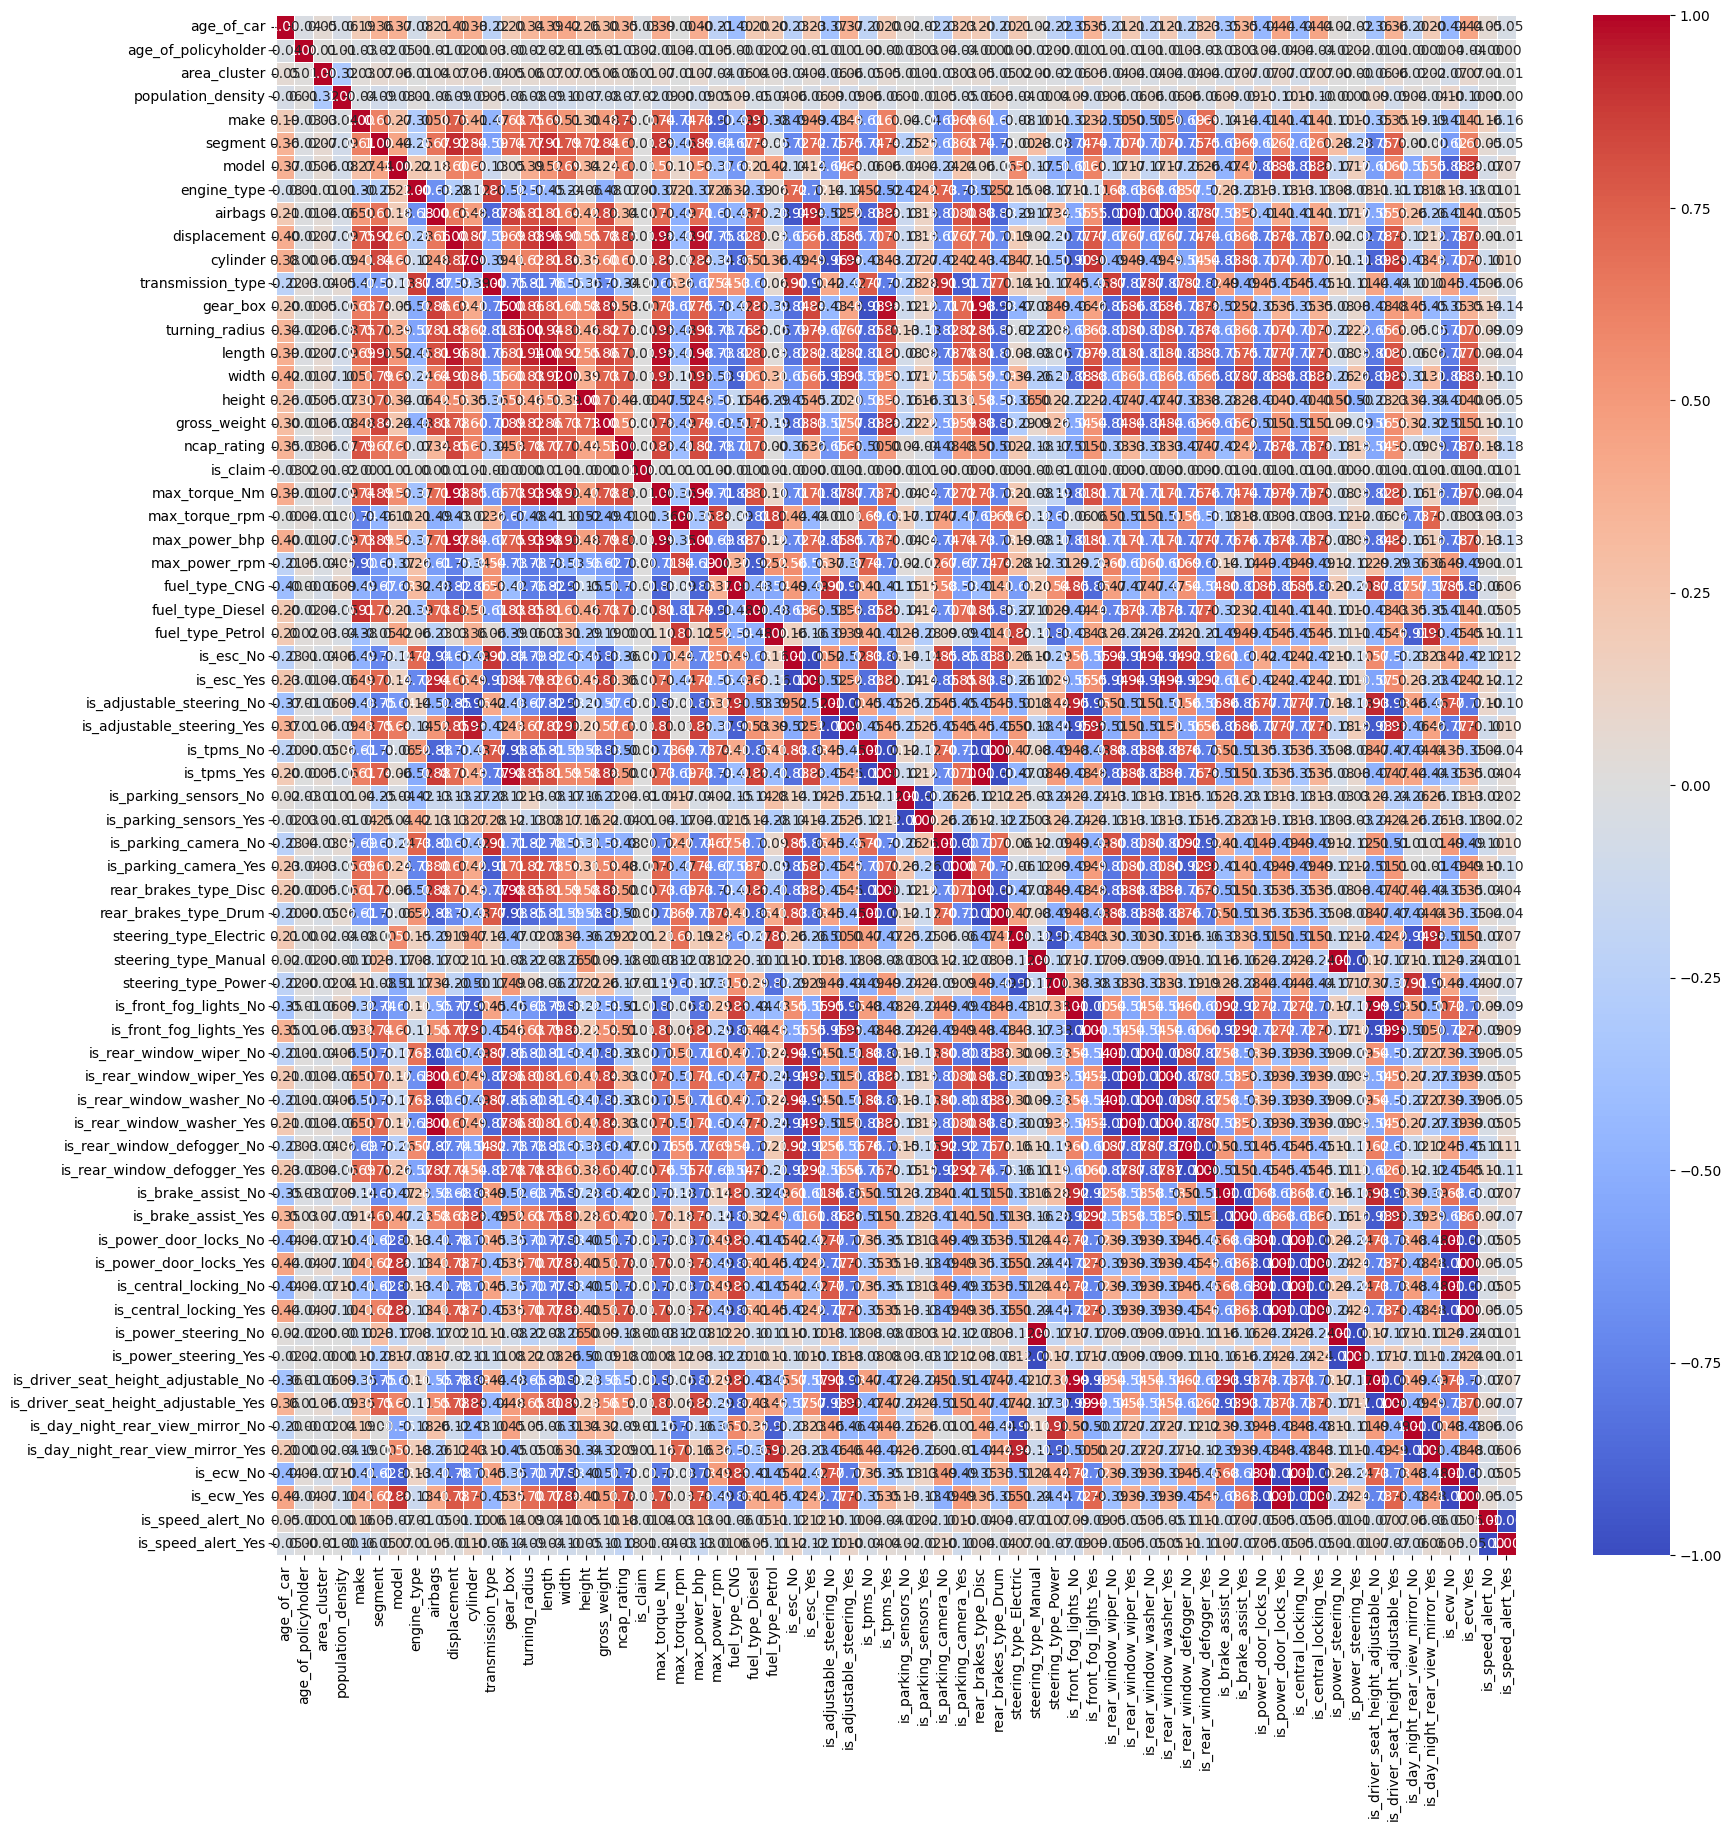

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [30]:
# Listing out Highly correlated variables

# We remove highly correlated variables to avoid unstable models and poor predictive performance

corr_df = df.corr(method="pearson")

high_correlation = abs( corr_df [ corr_df >= 0.9 ])
high_correlation[ high_correlation <= 1.0 ].stack().to_string()


'age_of_car                            age_of_car                              1.000000\nage_of_policyholder                   age_of_policyholder                     1.000000\narea_cluster                          area_cluster                            1.000000\npopulation_density                    population_density                      1.000000\nmake                                  make                                    1.000000\n                                      fuel_type_Diesel                        0.906608\nsegment                               segment                                 1.000000\n                                      displacement                            0.923359\n                                      length                                  0.909128\nmodel                                 model                                   1.000000\nengine_type                           engine_type                             1.000000\nairbags                        

In [31]:
corr_df = df.corr()["is_claim"].sort_values(ascending=False)
tmp = pd.DataFrame({"column": corr_df.index, "Correlation with is_claim": corr_df.values})
tmp

column  Correlation with is_claim
0                     is_claim                   1.000000
1          age_of_policyholder                   0.022451
2   is_adjustable_steering_Yes                   0.013912
3                     cylinder                   0.013436
4      is_front_fog_lights_Yes                   0.011821
..                         ...                        ...
61          is_brake_assist_No                  -0.010891
62      is_front_fog_lights_No                  -0.011821
63   is_adjustable_steering_No                  -0.013912
64          population_density                  -0.017828
65                  age_of_car                  -0.028093

[66 rows x 2 columns]

In [32]:
tmp.loc[(tmp["column"]=='max_torque_Nm') | (tmp["column"]=='max_torque_rpm') | (tmp["column"]=='max_power_bhp') | (tmp["column"]=='max_power_rpm')]

column  Correlation with is_claim
13   max_torque_Nm                   0.007409
21   max_power_bhp                   0.006397
23  max_torque_rpm                   0.005422
34   max_power_rpm                   0.001587

In [33]:
columns_to_drop = ["is_speed_alert_Yes","is_ecw_Yes","is_day_night_rear_view_mirror_Yes",
                   "is_driver_seat_height_adjustable_No","is_power_steering_No",
                   "is_central_locking_Yes","is_power_door_locks_Yes","is_brake_assist_Yes",
                   "is_rear_window_defogger_Yes","is_rear_window_washer_Yes","is_front_fog_lights_Yes",
                   "rear_brakes_type_Disc","is_parking_camera_No","is_parking_sensors_No",
                   "is_tpms_Yes","is_adjustable_steering_Yes","is_esc_No","is_rear_window_wiper_Yes",
                   "segment","rear_brakes_type_Drum","is_adjustable_steering_No",
                   "is_rear_window_wiper_Yes","is_front_fog_lights_No","steering_type_Power",
                   "length","is_ecw_No","is_central_locking_No","airbags","make",
                   "max_power_rpm","transmission_type","transmission_type",
                   "gear_box","fuel_type_Diesel","is_power_door_locks_No",
                   "is_rear_window_washer_No","is_rear_window_washer_No",
                   "steering_type_Manual","is_day_night_rear_view_mirror_No",
                   "displacement","fuel_type_CNG","is_brake_assist_No",
                   "is_rear_window_wiper_No","is_rear_window_defogger_No",
]

df.drop(columns_to_drop, axis= 1, inplace=True)


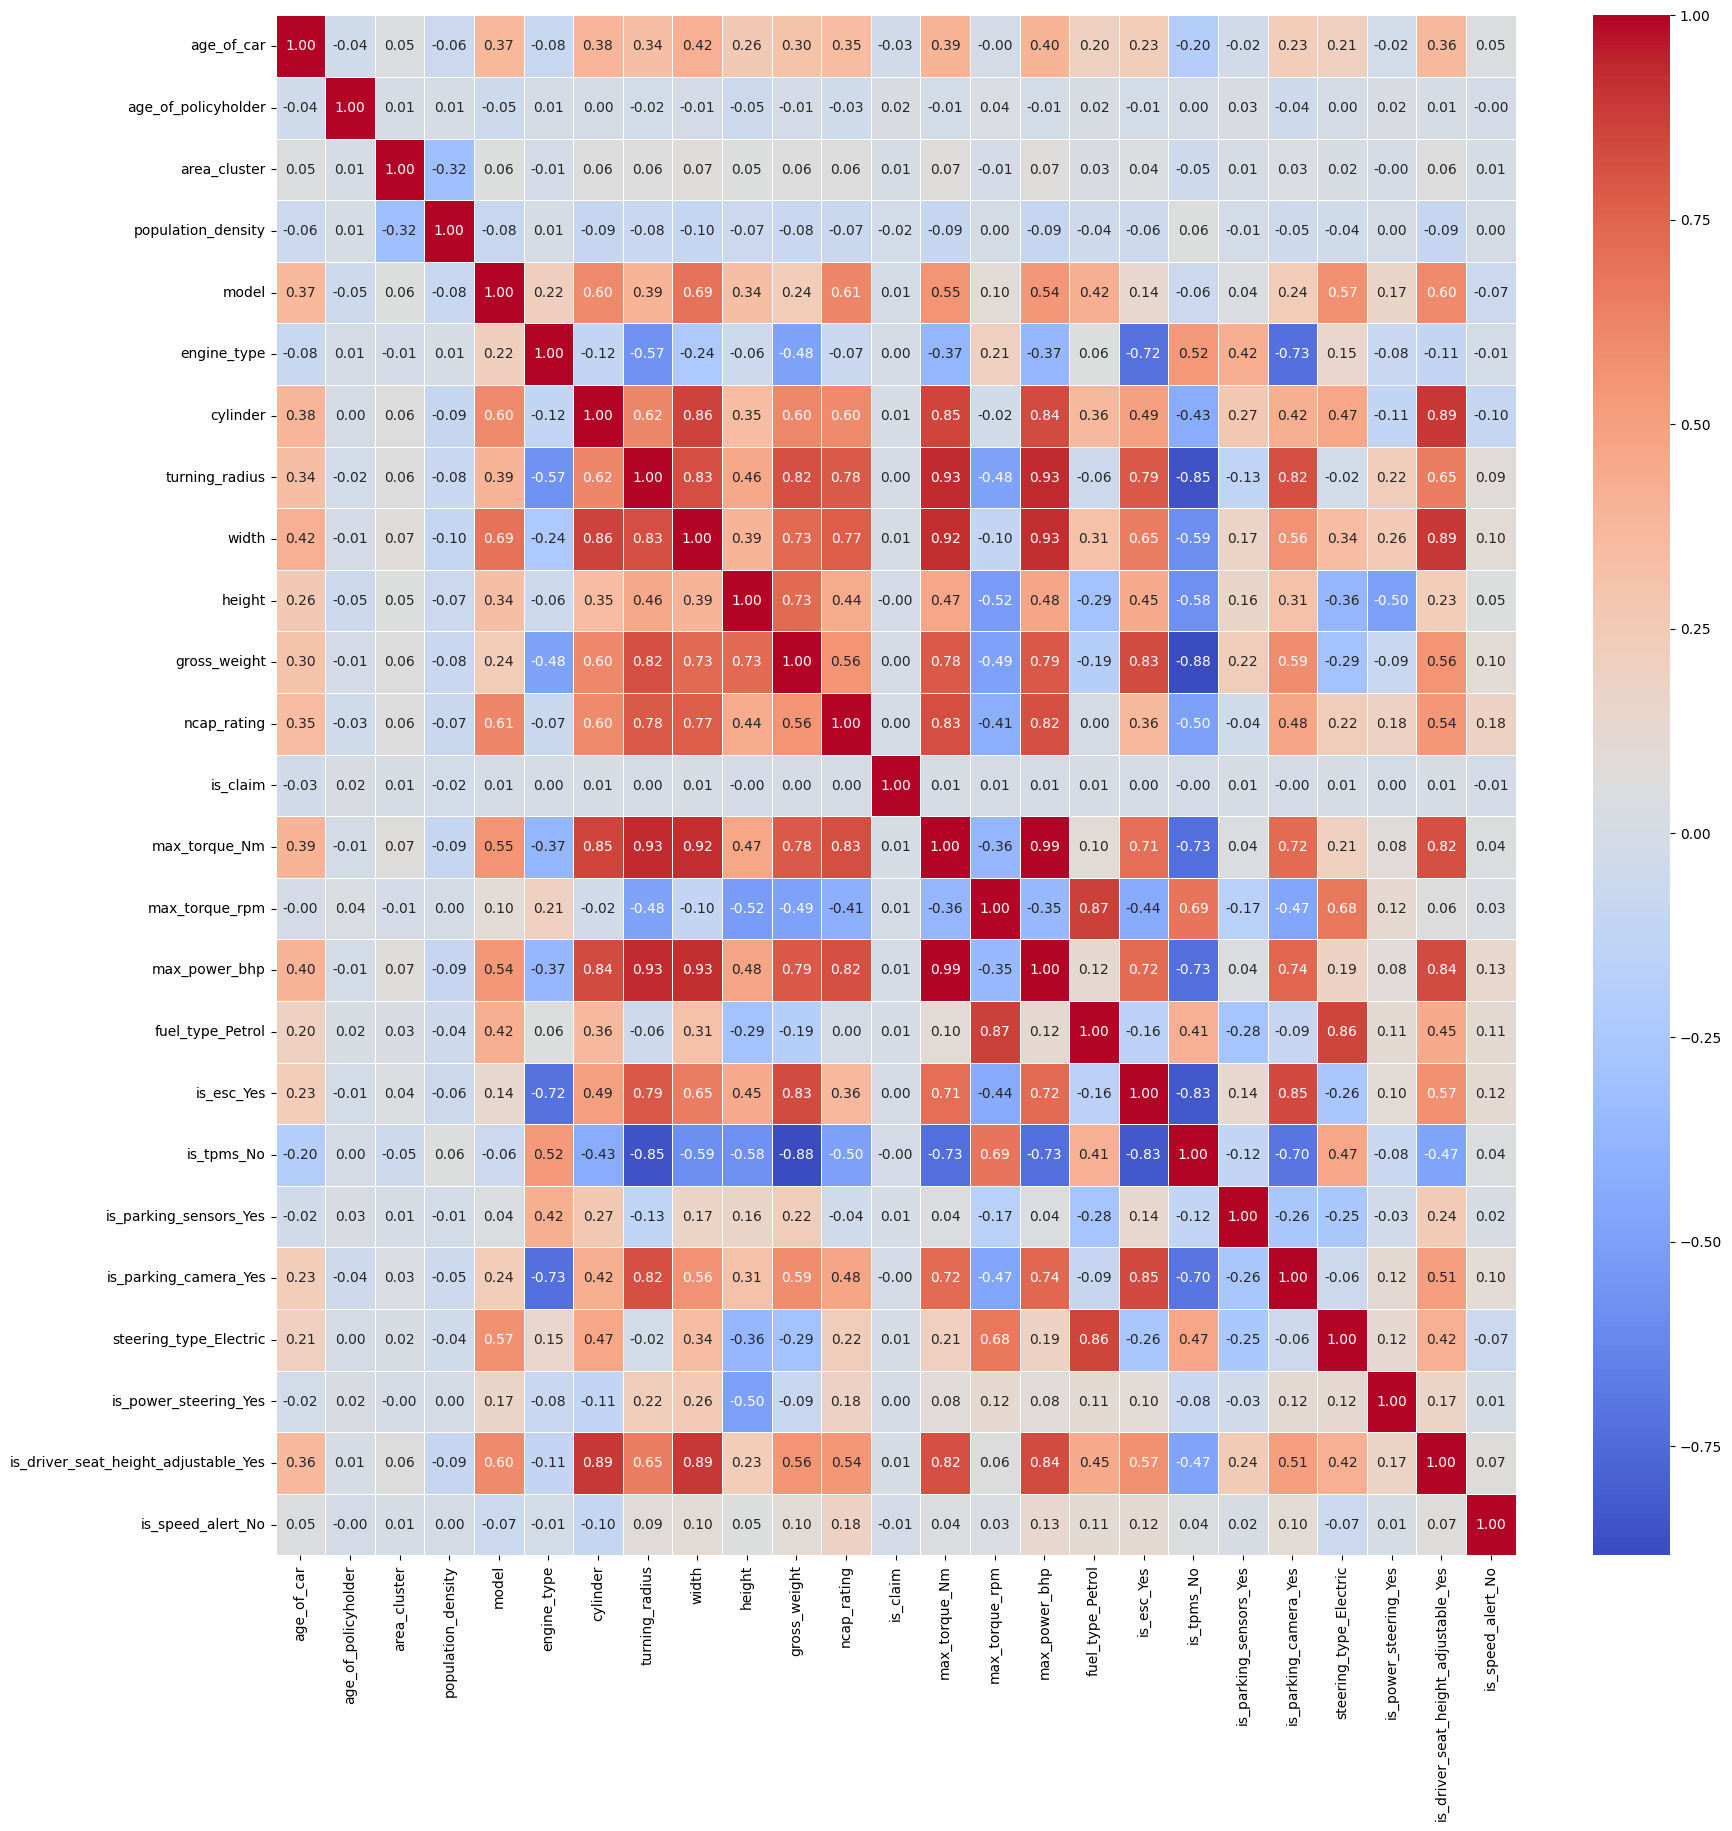

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",cmap="coolwarm")
plt.show()

In [35]:
cor=df.corr()["is_claim"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with is_claim":cor.values})


column  Correlation with is_claim
0                               is_claim                   1.000000
1                    age_of_policyholder                   0.022451
2                               cylinder                   0.013436
3   is_driver_seat_height_adjustable_Yes                   0.010682
4                                  width                   0.009947
5                 steering_type_Electric                   0.009836
6                           area_cluster                   0.009435
7                 is_parking_sensors_Yes                   0.008425
8                          max_torque_Nm                   0.007409
9                       fuel_type_Petrol                   0.007243
10                                 model                   0.006560
11                         max_power_bhp                   0.006397
12                        max_torque_rpm                   0.005422
13                          gross_weight                   0.003908
14                           ncap_rating                   0.003805
15                            is_esc_Yes                   0.002996
16                        turning_radius                   0.002724
17                 is_power_steering_Yes                   0.002101
18                           engine_type                   0.000937
19                            is_tpms_No                  -0.000709
20                 is_parking_camera_Yes                  -0.000874
21                                height                  -0.001987
22                     is_speed_alert_No                  -0.007309
23                    population_density                  -0.017828
24                            age_of_car                  -0.028093

In [36]:
## Reordering Dataframe columns for train and test datasets

In [37]:
list(df.columns)

['age_of_car',
 'age_of_policyholder',
 'area_cluster',
 'population_density',
 'model',
 'engine_type',
 'cylinder',
 'turning_radius',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'is_claim',
 'max_torque_Nm',
 'max_torque_rpm',
 'max_power_bhp',
 'fuel_type_Petrol',
 'is_esc_Yes',
 'is_tpms_No',
 'is_parking_sensors_Yes',
 'is_parking_camera_Yes',
 'steering_type_Electric',
 'is_power_steering_Yes',
 'is_driver_seat_height_adjustable_Yes',
 'is_speed_alert_No']

In [38]:
columns_order = ['age_of_car',
 'age_of_policyholder',
 'area_cluster',
 'population_density',
 'model',
 'engine_type',
 'cylinder',
 'turning_radius',
 'width',
 'height',
 'gross_weight',
 'ncap_rating',
 'max_torque_Nm',
 'max_torque_rpm',
 'max_power_bhp',
 'fuel_type_Petrol',
 'is_esc_Yes',
 'is_tpms_No',
 'is_parking_sensors_Yes',
 'is_parking_camera_Yes',
 'steering_type_Electric',
 'is_power_steering_Yes',
 'is_driver_seat_height_adjustable_Yes',
 'is_speed_alert_No',
 'is_claim']

df = df[columns_order]
df

age_of_car  age_of_policyholder  area_cluster  population_density  \
0        0.083333             0.644231             0            0.064260   
1        0.033333             0.375000            11            0.365231   
2        0.033333             0.384615            15            0.051764   
3        0.183333             0.432692            16            0.291660   
4        0.183333             0.634615            17            0.470987   
...           ...                  ...           ...                 ...   
58587    0.216667             0.644231            20            0.116270   
58588    0.033333             0.519231             5            0.102516   
58589    0.083333             0.451923            17            0.470987   
58590    0.233333             0.557692            20            0.116270   
58591    0.033333             0.442308            20            0.116270   

       model  engine_type  cylinder  turning_radius  width  height  ...  \
0          0            6         3             4.6   1515    1475  ...   
1          0            6         3             4.6   1515    1475  ...   
2          0            6         3             4.6   1515    1475  ...   
3          3            2         4             4.8   1735    1515  ...   
4          4            0         3             5.0   1579    1490  ...   
...      ...          ...       ...             ...    ...     ...  ...   
58587      4            0         3             5.0   1579    1490  ...   
58588      0            6         3             4.6   1515    1475  ...   
58589      0            6         3             4.6   1515    1475  ...   
58590      7            8         4             4.8   1735    1530  ...   
58591      5            3         4             5.2   1790    1635  ...   

       fuel_type_Petrol  is_esc_Yes  is_tpms_No  is_parking_sensors_Yes  \
0                 False       False        True                    True   
1                 False       False        True                    True   
2                 False       False        True                    True   
3                  True        True        True                    True   
4                  True       False        True                   False   
...                 ...         ...         ...                     ...   
58587              True       False        True                   False   
58588             False       False        True                    True   
58589             False       False        True                    True   
58590              True       False        True                    True   
58591             False        True       False                    True   

       is_parking_camera_Yes  steering_type_Electric  is_power_steering_Yes  \
0                      False                   False                   True   
1                      False                   False                   True   
2                      False                   False                   True   
3                       True                    True                   True   
4                       True                    True                   True   
...                      ...                     ...                    ...   
58587                   True                    True                   True   
58588                  False                   False                   True   
58589                  False                   False                   True   
58590                  False                    True                   True   
58591                   True                   False                   True   

       is_driver_seat_height_adjustable_Yes  is_speed_alert_No  is_claim  
0                                     False              False         0  
1                                     False              False         0  
2                                     False              False         0  
3                                      True

<a id="5"></a>
## 5. Predictive Modeling

In [39]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.3 MB/s eta 0:00:00


In [40]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [41]:
# Let's go with straightforward modeling, without any parameter tuning.

X = df.drop("is_claim",axis=1)
y = df["is_claim"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [42]:
# Classifier Models used

# Logistic Regression
logistic_reg = LogisticRegression().fit(X_train,y_train)

# Bernoulli naive bayesian
naive_bayes = BernoulliNB().fit(X_train,y_train)

# K Nearest Neighbors
k_nearest = KNeighborsClassifier().fit(X_train,y_train)

# Multi-layer Perceptron Classifier
mlp_nn = MLPClassifier().fit(X_train,y_train)

# Decision Tree Classifier
decision_tree = DecisionTreeClassifier().fit(X_train,y_train)

# Random Forest Classifier
random_for = RandomForestClassifier().fit(X_train,y_train)

# ADA Boost Classifier
ada_boost = AdaBoostClassifier().fit(X_train,y_train)

# XGBoost Classifier
xgb_boost = XGBClassifier().fit(X_train,y_train)

# Gradient Boosting Classifier
gbm_boost = GradientBoostingClassifier().fit(X_train,y_train)

# Light GBM Classifier
lgb_boost = LGBMClassifier().fit(X_train,y_train)

# CAT Boost Classifier
cat_boost = CatBoostClassifier().fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
Learning rate set to 0.051812
0:	learn: 0.6343314	total: 58.8ms	remaining: 58.8s
1:	learn: 0.5832931	total: 70.1ms	remaining: 35s
2:	learn: 0.5388698	total: 85.2ms	remaining: 28.3s
3:	learn: 0.5002216	total: 96.5ms	remaining: 24s
4:	learn: 0.4666779	total: 108ms	remaining: 21.4s
5:	learn: 0.4365648	total: 119ms	remaining: 19.8s
6:	learn: 0.4113551	total: 129ms	remaining: 18.2s
7:	learn: 0.3894117	total: 139ms	remaining: 17.2s
8:	learn: 0.37

In [43]:
model_dict = {
    "Logistic Regression": logistic_reg,
    "Naive Bayesian": naive_bayes,
    "K Nearest Neighbors": k_nearest,
    "Multi-layer Perceptron Neural Network": mlp_nn,
    "Decision Tree": decision_tree,
    "Random Forest": random_for,
    "AdaBoost": ada_boost,
    "XGBoost": xgb_boost,
    "Gradient Boosting Machine": gbm_boost,
    "LightGBM": lgb_boost,
    "CatBoost": cat_boost
}

model_accuracies = {}

def get_model_accuracy(model_name, pred_model):

    y_pred = pred_model.predict(X_test)

    model_accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = model_accuracy
    model_report = classification_report(y_test, y_pred)

    return model_accuracy, model_report

In [44]:
def model_result(model_dict):
    for model_name, model_value in model_dict.items():

        model_accuracy, model_report = get_model_accuracy(model_name, model_value)

        print("---------------------------------------------------")
        print("{} Accuracy : {}".format(model_name, model_accuracy))

        print()
        print("{} Classification Report: ".format(model_name))
        print(model_report)

    print("*******************************************")
    if(len(model_dict) > 1):
        highest_accuracy = max(model_accuracies.values())
        highest_accuracy_model = [model_name for model_name in model_accuracies if model_accuracies[model_name] == highest_accuracy][0]
        print("{} Model has the Highest Accuracy: {} ".format(highest_accuracy_model, highest_accuracy))

In [45]:
model_result(model_dict)

---------------------------------------------------
Logistic Regression Accuracy : 0.9339796545367652

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     13680
           1       0.00      0.00      0.00       967

    accuracy                           0.93     14647
   macro avg       0.47      0.50      0.48     14647
weighted avg       0.87      0.93      0.90     14647

---------------------------------------------------
Naive Bayesian Accuracy : 0.9339796545367652

Naive Bayesian Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     13680
           1       0.00      0.00      0.00       967

    accuracy                           0.93     14647
   macro avg       0.47      0.50      0.48     14647
weighted avg       0.87      0.93      0.90     14647

---------------------------------------------------
K Nearest 

### Observations:

With default parameters, we have achieved a pretty decent accuracy for all models.
<br>
Highest accuracy is tied with Logistic Regression, MLP Classifier, Light GBM

<a id="6"></a>
## 6. Hyperparameter Tuning

### Logistic Regression

In [46]:
logistic_params = {
    "penalty" : ["l1","l2"],
    "C" : [0.3,0.5,0.8,1],
    "solver" : ["lbfgs","liblinear"]

}

logistic_tuned = GridSearchCV(logistic_reg, logistic_params, cv=10, n_jobs=-1, verbose=2).fit(X_train,y_train)


logistic_tuned.best_params_

Fitting 10 folds for each of 16 candidates, totalling 160 fits


{'C': 0.3, 'penalty': 'l1', 'solver': 'liblinear'}

In [47]:
# Training with best parameters
logistic_tuned_model = LogisticRegression(**logistic_tuned.best_params_).fit(X_train,y_train)

model_result({"Logistic Regression Tuned": logistic_tuned_model})

---------------------------------------------------
Logistic Regression Tuned Accuracy : 0.9339796545367652

Logistic Regression Tuned Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     13680
           1       0.00      0.00      0.00       967

    accuracy                           0.93     14647
   macro avg       0.47      0.50      0.48     14647
weighted avg       0.87      0.93      0.90     14647

*******************************************


### MLP Classifier

In [48]:
mlp_params = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.01, 0.1],
}

mlp_cv = GridSearchCV(mlp_nn, mlp_params, cv=2, n_jobs=-1, verbose=2).fit(X_train,y_train)

mlp_cv.best_params_

Fitting 2 folds for each of 8 candidates, totalling 16 fits


{'activation': 'relu',
 'hidden_layer_sizes': (100,),
 'learning_rate_init': 0.01}

In [49]:
# Training with best parameters
mlp_tuned = MLPClassifier(**mlp_cv.best_params_).fit(X_train,y_train)

model_result({"Multilayer Perceptron Classifier Tuned": mlp_tuned})

---------------------------------------------------
Multilayer Perceptron Classifier Tuned Accuracy : 0.9339796545367652

Multilayer Perceptron Classifier Tuned Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     13680
           1       0.00      0.00      0.00       967

    accuracy                           0.93     14647
   macro avg       0.47      0.50      0.48     14647
weighted avg       0.87      0.93      0.90     14647

*******************************************


### Light GBM

In [50]:
lgbm_params = {
    'n_estimators': [50, 1000],
    'num_leaves': [2, 50],
    'learning_rate': [0.05, 0.7],
    'max_depth': [2, 15, 9],
}


lgb_cv = GridSearchCV(lgb_boost, lgbm_params, cv=2, n_jobs=-1, verbose=2).fit(X_train,y_train)

lgb_cv.best_params_

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50, 'num_leaves': 2}

In [51]:
# Training with best parameters
lgb_tuned = LGBMClassifier(**lgb_cv.best_params_).fit(X_train,y_train)

model_result({"Light GBM Classifier Tuned": lgb_tuned})

[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
---------------------------------------------------
Light GBM Classifier Tuned Accuracy : 0.9339796545367652

Light GBM Classifier Tuned Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     13680
           1       0.00      0.00      0.00       967

    accuracy                           0.93     14647
   macro avg       0.47      0.50      0.48     14647
weighted av

In [52]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 9.1 MB/s eta 0:00:00


In [53]:
import optuna
from optuna import Trial,visualization,trial
from optuna.samplers import TPESampler

In [54]:
def get_lgb_accuracy(params):
    lgb_model = LGBMClassifier(**params).fit(X_train,y_train)
    y_pred = lgb_model.predict(X_test)
    lgb_accuracy = accuracy_score(y_test, y_pred)
    return lgb_accuracy

In [55]:
def configs(trial):
    param_grid = {
        "n_estimators":trial.suggest_int("n_estimators",50,1000),
        "num_leaves":trial.suggest_int("num_leaves ",2,50),
        "max_depth":trial.suggest_int("max_depth",2,15),
        "min_child_samples":trial.suggest_int("min_child_samples",1,50),
        "learning_rate":trial.suggest_loguniform("learning_rate",0.05,0.7),
    }

    return(get_lgb_accuracy(param_grid))


opt_study = optuna.create_study(direction="maximize")
opt_study.optimize(configs,n_trials=300)

best_trial_run = opt_study.best_trial
print("Light GBM Tuned Accuracy: {}".format(best_trial_run.value))

[I 2024-04-22 03:45:24,484] A new study created in memory with name: no-name-8ef09b85-b366-4906-99a2-4e15f2b75253


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:45:26,937] Trial 0 finished with value: 0.9285860585785485 and parameters: {'n_estimators': 551, 'num_leaves ': 8, 'max_depth': 10, 'min_child_samples': 4, 'learning_rate': 0.3035610376254446}. Best is trial 0 with value: 0.9285860585785485.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:45:31,230] Trial 1 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 687, 'num_leaves ': 3, 'max_depth': 9, 'min_child_samples': 1, 'learning_rate': 0.17226639803466923}. Best is trial 1 with value: 0.9339113811702056.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:45:42,090] Trial 2 finished with value: 0.9332286475046084 and parameters: {'n_estimators': 818, 'num_leaves ': 23, 'max_depth': 4, 'min_child_samples': 4, 'learning_rate': 0.06835285603460158}. Best is trial 1 with value: 0.9339113811702056.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:45:51,333] Trial 3 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 961, 'num_leaves ': 4, 'max_depth': 13, 'min_child_samples': 6, 'learning_rate': 0.05623567633895295}. Best is trial 1 with value: 0.9339113811702056.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:45:53,761] Trial 4 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 131, 'num_leaves ': 39, 'max_depth': 12, 'min_child_samples': 31, 'learning_rate': 0.12710688140944812}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:01,928] Trial 5 finished with value: 0.9151362053662866 and parameters: {'n_estimators': 701, 'num_leaves ': 34, 'max_depth': 10, 'min_child_samples': 41, 'learning_rate': 0.6142735915518351}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:46:04,364] Trial 6 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 152, 'num_leaves ': 46, 'max_depth': 3, 'min_child_samples': 34, 'learning_rate': 0.22576800297079366}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:08,115] Trial 7 finished with value: 0.9294736123438246 and parameters: {'n_estimators': 576, 'num_leaves ': 34, 'max_depth': 15, 'min_child_samples': 9, 'learning_rate': 0.16592422942374876}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:08,628] Trial 8 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 95, 'num_leaves ': 10, 'max_depth': 15, 'min_child_samples': 15, 'learning_rate': 0.14330239308649487}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:46:12,565] Trial 9 finished with value: 0.9221683621219362 and parameters: {'n_estimators': 646, 'num_leaves ': 39, 'max_depth': 6, 'min_child_samples': 6, 'learning_rate': 0.3435694593062538}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:14,440] Trial 10 finished with value: 0.9329555540383696 and parameters: {'n_estimators': 322, 'num_leaves ': 50, 'max_depth': 12, 'min_child_samples': 23, 'learning_rate': 0.09455284908509058}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:46:14,880] Trial 11 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 81, 'num_leaves ': 50, 'max_depth': 2, 'min_child_samples': 38, 'learning_rate': 0.2829674049179388}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:46:16,942] Trial 12 finished with value: 0.9332969208711681 and parameters: {'n_estimators': 310, 'num_leaves ': 42, 'max_depth': 7, 'min_child_samples': 32, 'learning_rate': 0.09989872158187925}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:46:18,494] Trial 13 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 249, 'num_leaves ': 25, 'max_depth': 2, 'min_child_samples': 48, 'learning_rate': 0.2533078246286146}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:20,445] Trial 14 finished with value: 0.9276302314467126 and parameters: {'n_estimators': 183, 'num_leaves ': 42, 'max_depth': 12, 'min_child_samples': 26, 'learning_rate': 0.5002130020679689}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:46:23,047] Trial 15 finished with value: 0.9336382877039667 and parameters: {'n_estimators': 400, 'num_leaves ': 32, 'max_depth': 5, 'min_child_samples': 28, 'learning_rate': 0.11483266058980478}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:24,897] Trial 16 finished with value: 0.9290639721444665 and parameters: {'n_estimators': 436, 'num_leaves ': 16, 'max_depth': 8, 'min_child_samples': 18, 'learning_rate': 0.42236644130458717}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:25,948] Trial 17 finished with value: 0.9331603741380488 and parameters: {'n_estimators': 181, 'num_leaves ': 44, 'max_depth': 13, 'min_child_samples': 36, 'learning_rate': 0.21243751660054422}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:46:26,380] Trial 18 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 52, 'num_leaves ': 31, 'max_depth': 4, 'min_child_samples': 47, 'learning_rate': 0.12729448256462117}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

[I 2024-04-22 03:46:28,825] Trial 19 finished with value: 0.9329555540383696 and parameters: {'n_estimators': 427, 'num_leaves ': 46, 'max_depth': 11, 'min_child_samples': 33, 'learning_rate': 0.08255756294548287}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:46:29,858] Trial 20 finished with value: 0.9330921007714891 and parameters: {'n_estimators': 162, 'num_leaves ': 38, 'max_depth': 8, 'min_child_samples': 42, 'learning_rate': 0.22989677277599463}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:30,560] Trial 21 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 124, 'num_leaves ': 15, 'max_depth': 14, 'min_child_samples': 19, 'learning_rate': 0.1431118517218383}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:32,306] Trial 22 finished with value: 0.9327507339386906 and parameters: {'n_estimators': 252, 'num_leaves ': 19, 'max_depth': 15, 'min_child_samples': 13, 'learning_rate': 0.17215285431388774}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:32,934] Trial 23 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 60, 'num_leaves ': 10, 'max_depth': 14, 'min_child_samples': 30, 'learning_rate': 0.14534900122039307}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:34,690] Trial 24 finished with value: 0.9327507339386906 and parameters: {'n_estimators': 240, 'num_leaves ': 27, 'max_depth': 11, 'min_child_samples': 22, 'learning_rate': 0.1933097004824236}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:36,431] Trial 25 finished with value: 0.9327507339386906 and parameters: {'n_estimators': 340, 'num_leaves ': 38, 'max_depth': 14, 'min_child_samples': 16, 'learning_rate': 0.11464161361604171}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:37,643] Trial 26 finished with value: 0.9337748344370861 and parameters: {'n_estimators': 155, 'num_leaves ': 47, 'max_depth': 13, 'min_child_samples': 13, 'learning_rate': 0.07475028187403047}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:46:38,267] Trial 27 finished with value: 0.9338431078036458 and parameters: {'n_estimators': 111, 'num_leaves ': 29, 'max_depth': 3, 'min_child_samples': 35, 'learning_rate': 0.355117158095885}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:46:39,451] Trial 28 finished with value: 0.9337065610705264 and parameters: {'n_estimators': 225, 'num_leaves ': 19, 'max_depth': 6, 'min_child_samples': 24, 'learning_rate': 0.14610954969002046}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:41,310] Trial 29 finished with value: 0.9330921007714891 and parameters: {'n_estimators': 471, 'num_leaves ': 10, 'max_depth': 10, 'min_child_samples': 42, 'learning_rate': 0.2597835186917846}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:43,266] Trial 30 finished with value: 0.9332969208711681 and parameters: {'n_estimators': 533, 'num_leaves ': 6, 'max_depth': 9, 'min_child_samples': 28, 'learning_rate': 0.21586870368241748}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:46:43,773] Trial 31 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 92, 'num_leaves ': 50, 'max_depth': 2, 'min_child_samples': 38, 'learning_rate': 0.306048629065071}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:46:44,191] Trial 32 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 58, 'num_leaves ': 48, 'max_depth': 3, 'min_child_samples': 38, 'learning_rate': 0.29630516194031326}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:46:45,046] Trial 33 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 115, 'num_leaves ': 44, 'max_depth': 3, 'min_child_samples': 33, 'learning_rate': 0.18275951559571552}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:46:46,808] Trial 34 finished with value: 0.9331603741380488 and parameters: {'n_estimators': 197, 'num_leaves ': 41, 'max_depth': 4, 'min_child_samples': 46, 'learning_rate': 0.4176942982021123}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:46:50,491] Trial 35 finished with value: 0.9338431078036458 and parameters: {'n_estimators': 848, 'num_leaves ': 36, 'max_depth': 2, 'min_child_samples': 39, 'learning_rate': 0.25714994202521907}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:46:52,299] Trial 36 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 279, 'num_leaves ': 46, 'max_depth': 5, 'min_child_samples': 44, 'learning_rate': 0.05734591976911371}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:53,522] Trial 37 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 378, 'num_leaves ': 2, 'max_depth': 15, 'min_child_samples': 29, 'learning_rate': 0.15872003150002398}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:54,429] Trial 38 finished with value: 0.9333651942377279 and parameters: {'n_estimators': 135, 'num_leaves ': 50, 'max_depth': 12, 'min_child_samples': 50, 'learning_rate': 0.19785571158375598}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:46:58,635] Trial 39 finished with value: 0.9096743360415102 and parameters: {'n_estimators': 762, 'num_leaves ': 40, 'max_depth': 10, 'min_child_samples': 36, 'learning_rate': 0.6552092376420279}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:01,120] Trial 40 finished with value: 0.9320680002730934 and parameters: {'n_estimators': 303, 'num_leaves ': 35, 'max_depth': 7, 'min_child_samples': 1, 'learning_rate': 0.09641410577947979}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:02,375] Trial 41 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 211, 'num_leaves ': 26, 'max_depth': 2, 'min_child_samples': 31, 'learning_rate': 0.2515188432107048}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:02,935] Trial 42 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 92, 'num_leaves ': 24, 'max_depth': 3, 'min_child_samples': 50, 'learning_rate': 0.28102373375441275}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosin

[I 2024-04-22 03:47:04,038] Trial 43 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 264, 'num_leaves ': 43, 'max_depth': 2, 'min_child_samples': 47, 'learning_rate': 0.3629559668969562}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:07,697] Trial 44 finished with value: 0.9331603741380488 and parameters: {'n_estimators': 591, 'num_leaves ': 48, 'max_depth': 5, 'min_child_samples': 40, 'learning_rate': 0.11434366005804128}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:08,651] Trial 45 finished with value: 0.9328190073052502 and parameters: {'n_estimators': 153, 'num_leaves ': 21, 'max_depth': 4, 'min_child_samples': 27, 'learning_rate': 0.5360053024750558}. Best is trial 4 with value: 0.9339796545367652.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:09,641] Trial 46 finished with value: 0.9340479279033249 and parameters: {'n_estimators': 192, 'num_leaves ': 14, 'max_depth': 3, 'min_child_samples': 34, 'learning_rate': 0.2297257810105253}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 

[I 2024-04-22 03:47:10,747] Trial 47 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 202, 'num_leaves ': 13, 'max_depth': 4, 'min_child_samples': 34, 'learning_rate': 0.132805618079163}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:11,196] Trial 48 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 75, 'num_leaves ': 8, 'max_depth': 6, 'min_child_samples': 25, 'learning_rate': 0.2316746545757315}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:15,955] Trial 49 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 954, 'num_leaves ': 4, 'max_depth': 13, 'min_child_samples': 31, 'learning_rate': 0.16726524195609235}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:17,630] Trial 50 finished with value: 0.9333651942377279 and parameters: {'n_estimators': 360, 'num_leaves ': 15, 'max_depth': 3, 'min_child_samples': 22, 'learning_rate': 0.3285176003191935}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:18,391] Trial 51 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 168, 'num_leaves ': 12, 'max_depth': 2, 'min_child_samples': 37, 'learning_rate': 0.2065166484499121}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further sp

[I 2024-04-22 03:47:19,328] Trial 52 finished with value: 0.9331603741380488 and parameters: {'n_estimators': 128, 'num_leaves ': 31, 'max_depth': 5, 'min_child_samples': 8, 'learning_rate': 0.2312859180549377}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 2

[I 2024-04-22 03:47:19,706] Trial 53 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 50, 'num_leaves ': 20, 'max_depth': 3, 'min_child_samples': 44, 'learning_rate': 0.393793963266646}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:47:21,421] Trial 54 finished with value: 0.9317266334402949 and parameters: {'n_estimators': 295, 'num_leaves ': 45, 'max_depth': 11, 'min_child_samples': 33, 'learning_rate': 0.18296790730749435}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:22,434] Trial 55 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 240, 'num_leaves ': 7, 'max_depth': 2, 'min_child_samples': 41, 'learning_rate': 0.27428185651086784}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:23,418] Trial 56 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 188, 'num_leaves ': 16, 'max_depth': 14, 'min_child_samples': 35, 'learning_rate': 0.12209795752727719}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:24,108] Trial 57 finished with value: 0.9336382877039667 and parameters: {'n_estimators': 98, 'num_leaves ': 24, 'max_depth': 4, 'min_child_samples': 29, 'learning_rate': 0.3130940261984646}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:25,039] Trial 58 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 150, 'num_leaves ': 10, 'max_depth': 12, 'min_child_samples': 11, 'learning_rate': 0.10451963709466856}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:26,473] Trial 59 finished with value: 0.9326824605721308 and parameters: {'n_estimators': 225, 'num_leaves ': 33, 'max_depth': 8, 'min_child_samples': 16, 'learning_rate': 0.16198525714953396}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:28,936] Trial 60 finished with value: 0.9338431078036458 and parameters: {'n_estimators': 336, 'num_leaves ': 13, 'max_depth': 3, 'min_child_samples': 31, 'learning_rate': 0.13897214365706653}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:29,786] Trial 61 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 74, 'num_leaves ': 37, 'max_depth': 9, 'min_child_samples': 47, 'learning_rate': 0.08592219662026682}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:30,380] Trial 62 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 117, 'num_leaves ': 29, 'max_depth': 2, 'min_child_samples': 44, 'learning_rate': 0.23995211788796159}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:30,996] Trial 63 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 87, 'num_leaves ': 31, 'max_depth': 4, 'min_child_samples': 48, 'learning_rate': 0.21605120151222484}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:31,911] Trial 64 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 174, 'num_leaves ': 48, 'max_depth': 3, 'min_child_samples': 42, 'learning_rate': 0.15219033068844431}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:32,550] Trial 65 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 128, 'num_leaves ': 39, 'max_depth': 2, 'min_child_samples': 39, 'learning_rate': 0.12259318952352599}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:33,018] Trial 66 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 53, 'num_leaves ': 42, 'max_depth': 15, 'min_child_samples': 20, 'learning_rate': 0.1297125036354212}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:33,949] Trial 67 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 148, 'num_leaves ': 28, 'max_depth': 4, 'min_child_samples': 45, 'learning_rate': 0.10548818058042904}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063

[I 2024-04-22 03:47:35,680] Trial 68 finished with value: 0.9338431078036458 and parameters: {'n_estimators': 259, 'num_leaves ': 34, 'max_depth': 6, 'min_child_samples': 36, 'learning_rate': 0.08735810506595731}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:47:36,308] Trial 69 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 103, 'num_leaves ': 18, 'max_depth': 7, 'min_child_samples': 49, 'learning_rate': 0.19310709061432288}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:37,266] Trial 70 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 185, 'num_leaves ': 22, 'max_depth': 3, 'min_child_samples': 26, 'learning_rate': 0.2774855570624184}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:39,301] Trial 71 finished with value: 0.9331603741380488 and parameters: {'n_estimators': 479, 'num_leaves ': 15, 'max_depth': 14, 'min_child_samples': 16, 'learning_rate': 0.14339847035190287}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:40,195] Trial 72 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 129, 'num_leaves ': 10, 'max_depth': 15, 'min_child_samples': 19, 'learning_rate': 0.1760229188978377}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:41,696] Trial 73 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 222, 'num_leaves ': 5, 'max_depth': 13, 'min_child_samples': 13, 'learning_rate': 0.11125742116831193}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:43,567] Trial 74 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 91, 'num_leaves ': 17, 'max_depth': 14, 'min_child_samples': 22, 'learning_rate': 0.15591076698184997}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:45,210] Trial 75 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 166, 'num_leaves ': 12, 'max_depth': 15, 'min_child_samples': 32, 'learning_rate': 0.12133887386067714}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005426 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:46,309] Trial 76 finished with value: 0.9337065610705264 and parameters: {'n_estimators': 112, 'num_leaves ': 26, 'max_depth': 14, 'min_child_samples': 5, 'learning_rate': 0.1327132448506744}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:46,863] Trial 77 finished with value: 0.9328872806718099 and parameters: {'n_estimators': 76, 'num_leaves ': 50, 'max_depth': 10, 'min_child_samples': 11, 'learning_rate': 0.2113643340526957}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:47:47,719] Trial 78 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 198, 'num_leaves ': 44, 'max_depth': 2, 'min_child_samples': 17, 'learning_rate': 0.2505784912470966}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:48,681] Trial 79 finished with value: 0.9330238274049293 and parameters: {'n_estimators': 150, 'num_leaves ': 46, 'max_depth': 11, 'min_child_samples': 34, 'learning_rate': 0.17142581144793265}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:51,735] Trial 80 finished with value: 0.9329555540383696 and parameters: {'n_estimators': 669, 'num_leaves ': 40, 'max_depth': 3, 'min_child_samples': 20, 'learning_rate': 0.329515105308524}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:52,134] Trial 81 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 54, 'num_leaves ': 9, 'max_depth': 14, 'min_child_samples': 29, 'learning_rate': 0.14610465296268188}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:52,729] Trial 82 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 74, 'num_leaves ': 12, 'max_depth': 13, 'min_child_samples': 30, 'learning_rate': 0.1356470704156318}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:53,407] Trial 83 finished with value: 0.9332286475046084 and parameters: {'n_estimators': 134, 'num_leaves ': 15, 'max_depth': 14, 'min_child_samples': 14, 'learning_rate': 0.2869609068520557}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:54,207] Trial 84 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 107, 'num_leaves ': 7, 'max_depth': 15, 'min_child_samples': 24, 'learning_rate': 0.19735760077774625}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:47:54,848] Trial 85 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 69, 'num_leaves ': 13, 'max_depth': 2, 'min_child_samples': 37, 'learning_rate': 0.2255618592621832}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:56,498] Trial 86 finished with value: 0.9320680002730934 and parameters: {'n_estimators': 181, 'num_leaves ': 49, 'max_depth': 12, 'min_child_samples': 27, 'learning_rate': 0.18362465026130337}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:47:57,608] Trial 87 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 141, 'num_leaves ': 11, 'max_depth': 4, 'min_child_samples': 34, 'learning_rate': 0.26494852362141774}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:47:59,200] Trial 88 finished with value: 0.9321362736396531 and parameters: {'n_estimators': 277, 'num_leaves ': 47, 'max_depth': 12, 'min_child_samples': 32, 'learning_rate': 0.15072356521640684}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:00,297] Trial 89 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 215, 'num_leaves ': 8, 'max_depth': 3, 'min_child_samples': 40, 'learning_rate': 0.12889826881259692}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:01,604] Trial 90 finished with value: 0.9324776404724517 and parameters: {'n_estimators': 243, 'num_leaves ': 36, 'max_depth': 15, 'min_child_samples': 28, 'learning_rate': 0.16344760960715762}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:48:02,095] Trial 91 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 91, 'num_leaves ': 49, 'max_depth': 2, 'min_child_samples': 38, 'learning_rate': 0.30162372732325893}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:02,703] Trial 92 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 121, 'num_leaves ': 47, 'max_depth': 2, 'min_child_samples': 35, 'learning_rate': 0.37111729583196396}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:03,584] Trial 93 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 163, 'num_leaves ': 50, 'max_depth': 3, 'min_child_samples': 43, 'learning_rate': 0.322333794023491}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:48:04,097] Trial 94 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 95, 'num_leaves ': 45, 'max_depth': 2, 'min_child_samples': 33, 'learning_rate': 0.24857389532193674}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:04,525] Trial 95 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 59, 'num_leaves ': 14, 'max_depth': 13, 'min_child_samples': 37, 'learning_rate': 0.3450503672450965}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:05,214] Trial 96 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 115, 'num_leaves ': 9, 'max_depth': 3, 'min_child_samples': 46, 'learning_rate': 0.3010509342111778}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:05,828] Trial 97 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 80, 'num_leaves ': 32, 'max_depth': 4, 'min_child_samples': 30, 'learning_rate': 0.10553168009559499}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:08,499] Trial 98 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 612, 'num_leaves ': 49, 'max_depth': 2, 'min_child_samples': 49, 'learning_rate': 0.2660851959030743}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-04-22 03:48:09,756] Trial 99 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 142, 'num_leaves ': 42, 'max_depth': 2, 'min_child_samples': 39, 'learning_rate': 0.11909715262656684}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:11,532] Trial 100 finished with value: 0.9320680002730934 and parameters: {'n_estimators': 206, 'num_leaves ': 20, 'max_depth': 5, 'min_child_samples': 30, 'learning_rate': 0.4313131500596355}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:11,945] Trial 101 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 55, 'num_leaves ': 48, 'max_depth': 3, 'min_child_samples': 40, 'learning_rate': 0.2978352526672653}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:12,579] Trial 102 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 104, 'num_leaves ': 45, 'max_depth': 3, 'min_child_samples': 38, 'learning_rate': 0.23740131372014311}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:48:12,995] Trial 103 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 67, 'num_leaves ': 43, 'max_depth': 2, 'min_child_samples': 36, 'learning_rate': 0.22449116835768135}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:13,422] Trial 104 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 50, 'num_leaves ': 48, 'max_depth': 4, 'min_child_samples': 41, 'learning_rate': 0.2042306583284955}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063

[I 2024-04-22 03:48:16,945] Trial 105 finished with value: 0.9331603741380488 and parameters: {'n_estimators': 754, 'num_leaves ': 23, 'max_depth': 3, 'min_child_samples': 35, 'learning_rate': 0.28360712396100174}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:17,919] Trial 106 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 172, 'num_leaves ': 17, 'max_depth': 14, 'min_child_samples': 43, 'learning_rate': 0.05008760554452193}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:18,455] Trial 107 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 85, 'num_leaves ': 11, 'max_depth': 9, 'min_child_samples': 32, 'learning_rate': 0.1422114574643963}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005641 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:19,308] Trial 108 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 126, 'num_leaves ': 46, 'max_depth': 15, 'min_child_samples': 38, 'learning_rate': 0.11263368348805056}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:20,000] Trial 109 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 157, 'num_leaves ': 3, 'max_depth': 3, 'min_child_samples': 47, 'learning_rate': 0.1257239012788725}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:20,548] Trial 110 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 107, 'num_leaves ': 30, 'max_depth': 2, 'min_child_samples': 15, 'learning_rate': 0.093052159190769}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:21,109] Trial 111 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 90, 'num_leaves ': 50, 'max_depth': 3, 'min_child_samples': 34, 'learning_rate': 0.17765359196112468}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-22 03:48:22,059] Trial 112 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 128, 'num_leaves ': 43, 'max_depth': 3, 'min_child_samples': 33, 'learning_rate': 0.24204670143899273}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-04-22 03:48:23,056] Trial 113 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 75, 'num_leaves ': 44, 'max_depth': 4, 'min_child_samples': 36, 'learning_rate': 0.18677748111510142}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020283 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-04-22 03:48:25,271] Trial 114 finished with value: 0.9330921007714891 and parameters: {'n_estimators': 188, 'num_leaves ': 47, 'max_depth': 11, 'min_child_samples': 32, 'learning_rate': 0.13737440945492949}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:26,039] Trial 115 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 110, 'num_leaves ': 49, 'max_depth': 13, 'min_child_samples': 31, 'learning_rate': 0.15710967466501338}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:26,911] Trial 116 finished with value: 0.9331603741380488 and parameters: {'n_estimators': 143, 'num_leaves ': 46, 'max_depth': 14, 'min_child_samples': 27, 'learning_rate': 0.22024950488240752}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:48:27,937] Trial 117 finished with value: 0.9322045470062129 and parameters: {'n_estimators': 161, 'num_leaves ': 40, 'max_depth': 7, 'min_child_samples': 12, 'learning_rate': 0.2648914609900297}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:48:28,377] Trial 118 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 75, 'num_leaves ': 6, 'max_depth': 2, 'min_child_samples': 45, 'learning_rate': 0.16789778960412172}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:29,762] Trial 119 finished with value: 0.9335700143374069 and parameters: {'n_estimators': 233, 'num_leaves ': 26, 'max_depth': 4, 'min_child_samples': 50, 'learning_rate': 0.20804002615510103}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005798 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:31,695] Trial 120 finished with value: 0.9337748344370861 and parameters: {'n_estimators': 415, 'num_leaves ': 48, 'max_depth': 3, 'min_child_samples': 18, 'learning_rate': 0.15013835957384644}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:38,334] Trial 121 finished with value: 0.9319314535399741 and parameters: {'n_estimators': 999, 'num_leaves ': 41, 'max_depth': 4, 'min_child_samples': 48, 'learning_rate': 0.25262393229209007}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:40,329] Trial 122 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 269, 'num_leaves ': 45, 'max_depth': 5, 'min_child_samples': 45, 'learning_rate': 0.06309973344359836}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:41,506] Trial 123 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 281, 'num_leaves ': 38, 'max_depth': 2, 'min_child_samples': 37, 'learning_rate': 0.3113327768880537}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:43,565] Trial 124 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 328, 'num_leaves ': 46, 'max_depth': 5, 'min_child_samples': 43, 'learning_rate': 0.059894823169393555}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:45,350] Trial 125 finished with value: 0.9338431078036458 and parameters: {'n_estimators': 367, 'num_leaves ': 14, 'max_depth': 3, 'min_child_samples': 46, 'learning_rate': 0.19259136636672358}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:46,370] Trial 126 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 196, 'num_leaves ': 50, 'max_depth': 3, 'min_child_samples': 41, 'learning_rate': 0.07475627511733478}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:47,099] Trial 127 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 101, 'num_leaves ': 28, 'max_depth': 8, 'min_child_samples': 34, 'learning_rate': 0.07263038840285359}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:47,725] Trial 128 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 125, 'num_leaves ': 47, 'max_depth': 2, 'min_child_samples': 25, 'learning_rate': 0.3332476020214994}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:48,556] Trial 129 finished with value: 0.9317266334402949 and parameters: {'n_estimators': 144, 'num_leaves ': 34, 'max_depth': 15, 'min_child_samples': 48, 'learning_rate': 0.38382784050487345}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:49,135] Trial 130 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 66, 'num_leaves ': 25, 'max_depth': 4, 'min_child_samples': 39, 'learning_rate': 0.29193646664338907}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:51,896] Trial 131 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 454, 'num_leaves ': 5, 'max_depth': 14, 'min_child_samples': 29, 'learning_rate': 0.1615322915981498}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:53,212] Trial 132 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 300, 'num_leaves ': 2, 'max_depth': 15, 'min_child_samples': 9, 'learning_rate': 0.1441530541549822}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:54,922] Trial 133 finished with value: 0.9334334676042876 and parameters: {'n_estimators': 363, 'num_leaves ': 18, 'max_depth': 15, 'min_child_samples': 29, 'learning_rate': 0.13119029979362037}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:55,925] Trial 134 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 215, 'num_leaves ': 9, 'max_depth': 15, 'min_child_samples': 33, 'learning_rate': 0.15382179588778488}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:48:58,563] Trial 135 finished with value: 0.9294736123438246 and parameters: {'n_estimators': 496, 'num_leaves ': 49, 'max_depth': 14, 'min_child_samples': 31, 'learning_rate': 0.17418446124635442}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:48:59,672] Trial 136 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 253, 'num_leaves ': 16, 'max_depth': 2, 'min_child_samples': 35, 'learning_rate': 0.23455830844526934}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:00,238] Trial 137 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 91, 'num_leaves ': 21, 'max_depth': 3, 'min_child_samples': 28, 'learning_rate': 0.27206147179405754}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:49:00,621] Trial 138 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 55, 'num_leaves ': 43, 'max_depth': 2, 'min_child_samples': 30, 'learning_rate': 0.2019579366237045}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:04,825] Trial 139 finished with value: 0.9326824605721308 and parameters: {'n_estimators': 552, 'num_leaves ': 37, 'max_depth': 5, 'min_child_samples': 21, 'learning_rate': 0.11813298126279728}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:06,454] Trial 140 finished with value: 0.9328190073052502 and parameters: {'n_estimators': 169, 'num_leaves ': 48, 'max_depth': 15, 'min_child_samples': 44, 'learning_rate': 0.1826309360568194}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:07,511] Trial 141 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 231, 'num_leaves ': 25, 'max_depth': 2, 'min_child_samples': 31, 'learning_rate': 0.2463680194242351}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:08,425] Trial 142 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 203, 'num_leaves ': 27, 'max_depth': 2, 'min_child_samples': 33, 'learning_rate': 0.27802744598607}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:10,291] Trial 143 finished with value: 0.9335700143374069 and parameters: {'n_estimators': 393, 'num_leaves ': 23, 'max_depth': 3, 'min_child_samples': 28, 'learning_rate': 0.25945960180003186}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:10,943] Trial 144 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 129, 'num_leaves ': 50, 'max_depth': 2, 'min_child_samples': 32, 'learning_rate': 0.13720370309971827}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:11,528] Trial 145 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 105, 'num_leaves ': 7, 'max_depth': 13, 'min_child_samples': 34, 'learning_rate': 0.22070618849246657}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:12,526] Trial 146 finished with value: 0.9335017409708473 and parameters: {'n_estimators': 182, 'num_leaves ': 11, 'max_depth': 4, 'min_child_samples': 36, 'learning_rate': 0.3074290746402629}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:13,048] Trial 147 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 81, 'num_leaves ': 47, 'max_depth': 3, 'min_child_samples': 49, 'learning_rate': 0.16414901007688565}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

[I 2024-04-22 03:49:16,401] Trial 148 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 881, 'num_leaves ': 44, 'max_depth': 2, 'min_child_samples': 30, 'learning_rate': 0.05044027574589067}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:17,692] Trial 149 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 150, 'num_leaves ': 4, 'max_depth': 3, 'min_child_samples': 32, 'learning_rate': 0.12589028664220267}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:18,410] Trial 150 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 50, 'num_leaves ': 29, 'max_depth': 6, 'min_child_samples': 27, 'learning_rate': 0.23151382966559372}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:19,411] Trial 151 finished with value: 0.9338431078036458 and parameters: {'n_estimators': 112, 'num_leaves ': 24, 'max_depth': 3, 'min_child_samples': 50, 'learning_rate': 0.3545791433067687}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:20,172] Trial 152 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 86, 'num_leaves ': 21, 'max_depth': 2, 'min_child_samples': 48, 'learning_rate': 0.2874599583989459}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:20,986] Trial 153 finished with value: 0.9332286475046084 and parameters: {'n_estimators': 119, 'num_leaves ': 27, 'max_depth': 14, 'min_child_samples': 47, 'learning_rate': 0.3202952590804494}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:21,660] Trial 154 finished with value: 0.9336382877039667 and parameters: {'n_estimators': 99, 'num_leaves ': 31, 'max_depth': 10, 'min_child_samples': 49, 'learning_rate': 0.26335525891319844}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

[I 2024-04-22 03:49:22,441] Trial 155 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 139, 'num_leaves ': 49, 'max_depth': 3, 'min_child_samples': 38, 'learning_rate': 0.14757322988562072}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

[I 2024-04-22 03:49:23,045] Trial 156 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 79, 'num_leaves ': 25, 'max_depth': 4, 'min_child_samples': 40, 'learning_rate': 0.2775927358513406}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:23,980] Trial 157 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 171, 'num_leaves ': 46, 'max_depth': 3, 'min_child_samples': 35, 'learning_rate': 0.25194666287902967}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.6

[I 2024-04-22 03:49:25,307] Trial 158 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 287, 'num_leaves ': 22, 'max_depth': 2, 'min_child_samples': 46, 'learning_rate': 0.21641894749357707}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:25,797] Trial 159 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 67, 'num_leaves ': 19, 'max_depth': 3, 'min_child_samples': 26, 'learning_rate': 0.15573989692224935}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063

[I 2024-04-22 03:49:26,381] Trial 160 finished with value: 0.9335700143374069 and parameters: {'n_estimators': 94, 'num_leaves ': 13, 'max_depth': 15, 'min_child_samples': 23, 'learning_rate': 0.3416669569366395}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:27,746] Trial 161 finished with value: 0.9333651942377279 and parameters: {'n_estimators': 316, 'num_leaves ': 10, 'max_depth': 6, 'min_child_samples': 31, 'learning_rate': 0.23972653132730992}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:49:28,126] Trial 162 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 50, 'num_leaves ': 8, 'max_depth': 4, 'min_child_samples': 17, 'learning_rate': 0.22642137874401488}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:28,756] Trial 163 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 120, 'num_leaves ': 6, 'max_depth': 6, 'min_child_samples': 29, 'learning_rate': 0.3006089045896218}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:49:29,254] Trial 164 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 73, 'num_leaves ': 12, 'max_depth': 5, 'min_child_samples': 25, 'learning_rate': 0.19569221682146012}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:49:29,995] Trial 165 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 154, 'num_leaves ': 8, 'max_depth': 2, 'min_child_samples': 19, 'learning_rate': 0.2732421497873815}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:30,750] Trial 166 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 105, 'num_leaves ': 14, 'max_depth': 12, 'min_child_samples': 50, 'learning_rate': 0.1420328050902706}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:31,360] Trial 167 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 73, 'num_leaves ': 2, 'max_depth': 14, 'min_child_samples': 42, 'learning_rate': 0.2864328920216137}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:49:32,455] Trial 168 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 135, 'num_leaves ': 10, 'max_depth': 5, 'min_child_samples': 34, 'learning_rate': 0.2541459173095451}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:34,402] Trial 169 finished with value: 0.9333651942377279 and parameters: {'n_estimators': 218, 'num_leaves ': 33, 'max_depth': 4, 'min_child_samples': 14, 'learning_rate': 0.3177868499046759}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:35,428] Trial 170 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 186, 'num_leaves ': 48, 'max_depth': 3, 'min_child_samples': 47, 'learning_rate': 0.169919392616924}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosin

[I 2024-04-22 03:49:36,208] Trial 171 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 160, 'num_leaves ': 13, 'max_depth': 2, 'min_child_samples': 37, 'learning_rate': 0.20512350921531652}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006603 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:37,293] Trial 172 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 250, 'num_leaves ': 12, 'max_depth': 2, 'min_child_samples': 33, 'learning_rate': 0.21846954280898262}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:37,837] Trial 173 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 94, 'num_leaves ': 11, 'max_depth': 2, 'min_child_samples': 36, 'learning_rate': 0.23942333487773865}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063

[I 2024-04-22 03:49:38,593] Trial 174 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 126, 'num_leaves ': 10, 'max_depth': 3, 'min_child_samples': 38, 'learning_rate': 0.17876139670622745}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063

[I 2024-04-22 03:49:39,656] Trial 175 finished with value: 0.9338431078036458 and parameters: {'n_estimators': 204, 'num_leaves ': 15, 'max_depth': 7, 'min_child_samples': 40, 'learning_rate': 0.1333059719917961}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:49:40,081] Trial 176 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 65, 'num_leaves ': 12, 'max_depth': 2, 'min_child_samples': 37, 'learning_rate': 0.20902108311749115}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:40,658] Trial 177 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 87, 'num_leaves ': 35, 'max_depth': 3, 'min_child_samples': 39, 'learning_rate': 0.5332097518084973}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number 

[I 2024-04-22 03:49:41,262] Trial 178 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 112, 'num_leaves ': 8, 'max_depth': 2, 'min_child_samples': 32, 'learning_rate': 0.18905794462422298}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:42,293] Trial 179 finished with value: 0.9315900867071756 and parameters: {'n_estimators': 177, 'num_leaves ': 45, 'max_depth': 15, 'min_child_samples': 30, 'learning_rate': 0.2575190811683505}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:43,049] Trial 180 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 140, 'num_leaves ': 9, 'max_depth': 4, 'min_child_samples': 35, 'learning_rate': 0.22739939492175354}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:44,048] Trial 181 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 218, 'num_leaves ': 6, 'max_depth': 2, 'min_child_samples': 41, 'learning_rate': 0.2697257319467374}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005642 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:45,357] Trial 182 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 234, 'num_leaves ': 10, 'max_depth': 2, 'min_child_samples': 42, 'learning_rate': 0.24450737847774778}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:46,644] Trial 183 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 195, 'num_leaves ': 3, 'max_depth': 3, 'min_child_samples': 44, 'learning_rate': 0.2910015327384522}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:48,372] Trial 184 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 272, 'num_leaves ': 7, 'max_depth': 2, 'min_child_samples': 2, 'learning_rate': 0.08113380188497159}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:49:48,812] Trial 185 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 68, 'num_leaves ': 5, 'max_depth': 2, 'min_child_samples': 39, 'learning_rate': 0.2322678398871282}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005683 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:49,217] Trial 186 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 50, 'num_leaves ': 47, 'max_depth': 3, 'min_child_samples': 37, 'learning_rate': 0.15097768253911473}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:50,737] Trial 187 finished with value: 0.9332969208711681 and parameters: {'n_estimators': 245, 'num_leaves ': 49, 'max_depth': 14, 'min_child_samples': 48, 'learning_rate': 0.11022011440522637}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:51,411] Trial 188 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 104, 'num_leaves ': 24, 'max_depth': 13, 'min_child_samples': 43, 'learning_rate': 0.1393287859389985}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:49:52,174] Trial 189 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 156, 'num_leaves ': 11, 'max_depth': 2, 'min_child_samples': 33, 'learning_rate': 0.2767357966376775}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:52,769] Trial 190 finished with value: 0.9336382877039667 and parameters: {'n_estimators': 89, 'num_leaves ': 26, 'max_depth': 11, 'min_child_samples': 35, 'learning_rate': 0.30387991704522066}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:53,727] Trial 191 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 184, 'num_leaves ': 14, 'max_depth': 14, 'min_child_samples': 36, 'learning_rate': 0.12018732975217529}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:54,890] Trial 192 finished with value: 0.9337748344370861 and parameters: {'n_estimators': 228, 'num_leaves ': 18, 'max_depth': 15, 'min_child_samples': 38, 'learning_rate': 0.12268787028624803}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:55,952] Trial 193 finished with value: 0.9337065610705264 and parameters: {'n_estimators': 204, 'num_leaves ': 16, 'max_depth': 14, 'min_child_samples': 34, 'learning_rate': 0.12497562288913032}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:57,121] Trial 194 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 268, 'num_leaves ': 9, 'max_depth': 13, 'min_child_samples': 10, 'learning_rate': 0.13186904854298998}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:49:57,853] Trial 195 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 121, 'num_leaves ': 16, 'max_depth': 15, 'min_child_samples': 31, 'learning_rate': 0.09956564789793224}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:00,142] Trial 196 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 344, 'num_leaves ': 28, 'max_depth': 3, 'min_child_samples': 33, 'learning_rate': 0.143249703078706}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:50:01,520] Trial 197 finished with value: 0.9322045470062129 and parameters: {'n_estimators': 140, 'num_leaves ': 50, 'max_depth': 14, 'min_child_samples': 35, 'learning_rate': 0.260327827810402}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:02,695] Trial 198 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 166, 'num_leaves ': 30, 'max_depth': 3, 'min_child_samples': 23, 'learning_rate': 0.21306358116529595}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:50:03,211] Trial 199 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 86, 'num_leaves ': 13, 'max_depth': 2, 'min_child_samples': 46, 'learning_rate': 0.24686625098801854}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:50:04,401] Trial 200 finished with value: 0.9332286475046084 and parameters: {'n_estimators': 246, 'num_leaves ': 15, 'max_depth': 9, 'min_child_samples': 39, 'learning_rate': 0.20312097857062808}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:04,983] Trial 201 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 65, 'num_leaves ': 39, 'max_depth': 5, 'min_child_samples': 47, 'learning_rate': 0.09048396257487358}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:50:05,695] Trial 202 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 75, 'num_leaves ': 44, 'max_depth': 9, 'min_child_samples': 49, 'learning_rate': 0.06308084307051398}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:06,311] Trial 203 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 113, 'num_leaves ': 48, 'max_depth': 2, 'min_child_samples': 50, 'learning_rate': 0.15961130691470024}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:07,069] Trial 204 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 88, 'num_leaves ': 39, 'max_depth': 8, 'min_child_samples': 45, 'learning_rate': 0.05336863114139635}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:50:07,549] Trial 205 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 50, 'num_leaves ': 33, 'max_depth': 10, 'min_child_samples': 37, 'learning_rate': 0.13454991408734507}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:08,191] Trial 206 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 103, 'num_leaves ': 42, 'max_depth': 3, 'min_child_samples': 32, 'learning_rate': 0.1123223572696053}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:50:08,841] Trial 207 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 76, 'num_leaves ': 36, 'max_depth': 11, 'min_child_samples': 47, 'learning_rate': 0.0751488334590747}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:09,676] Trial 208 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 126, 'num_leaves ': 41, 'max_depth': 4, 'min_child_samples': 31, 'learning_rate': 0.0681775255650666}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:10,518] Trial 209 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 178, 'num_leaves ': 37, 'max_depth': 2, 'min_child_samples': 48, 'learning_rate': 0.14908847596244187}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:50:11,856] Trial 210 finished with value: 0.9330238274049293 and parameters: {'n_estimators': 210, 'num_leaves ': 46, 'max_depth': 12, 'min_child_samples': 45, 'learning_rate': 0.12852501622385798}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:12,761] Trial 211 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 152, 'num_leaves ': 30, 'max_depth': 2, 'min_child_samples': 44, 'learning_rate': 0.2298419828469459}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:50:13,663] Trial 212 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 105, 'num_leaves ': 27, 'max_depth': 2, 'min_child_samples': 41, 'learning_rate': 0.26878463634014627}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:15,116] Trial 213 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 123, 'num_leaves ': 29, 'max_depth': 2, 'min_child_samples': 46, 'learning_rate': 0.24213038813235538}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:50:16,223] Trial 214 finished with value: 0.9333651942377279 and parameters: {'n_estimators': 66, 'num_leaves ': 25, 'max_depth': 7, 'min_child_samples': 15, 'learning_rate': 0.2894999612114282}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:50:16,853] Trial 215 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 86, 'num_leaves ': 28, 'max_depth': 2, 'min_child_samples': 34, 'learning_rate': 0.21744748329316035}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:17,656] Trial 216 finished with value: 0.9338431078036458 and parameters: {'n_estimators': 140, 'num_leaves ': 12, 'max_depth': 3, 'min_child_samples': 29, 'learning_rate': 0.25246818067317206}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

[I 2024-04-22 03:50:19,751] Trial 217 finished with value: 0.9335700143374069 and parameters: {'n_estimators': 302, 'num_leaves ': 32, 'max_depth': 14, 'min_child_samples': 40, 'learning_rate': 0.0835177480999379}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:50:20,672] Trial 218 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 105, 'num_leaves ': 8, 'max_depth': 13, 'min_child_samples': 49, 'learning_rate': 0.2346623486570452}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:50:21,919] Trial 219 finished with value: 0.9326824605721308 and parameters: {'n_estimators': 163, 'num_leaves ': 24, 'max_depth': 15, 'min_child_samples': 36, 'learning_rate': 0.3159344432846869}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:22,907] Trial 220 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 194, 'num_leaves ': 50, 'max_depth': 2, 'min_child_samples': 30, 'learning_rate': 0.2795991600273848}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:23,735] Trial 221 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 92, 'num_leaves ': 34, 'max_depth': 4, 'min_child_samples': 48, 'learning_rate': 0.2145475394409374}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063

[I 2024-04-22 03:50:24,490] Trial 222 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 74, 'num_leaves ': 30, 'max_depth': 5, 'min_child_samples': 49, 'learning_rate': 0.22377773680306537}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:25,084] Trial 223 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 63, 'num_leaves ': 26, 'max_depth': 3, 'min_child_samples': 47, 'learning_rate': 0.192453546440659}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:26,021] Trial 224 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 115, 'num_leaves ': 11, 'max_depth': 3, 'min_child_samples': 38, 'learning_rate': 0.25786754027190906}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:27,420] Trial 225 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 92, 'num_leaves ': 45, 'max_depth': 6, 'min_child_samples': 34, 'learning_rate': 0.10680033217131717}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:28,856] Trial 226 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 130, 'num_leaves ': 31, 'max_depth': 4, 'min_child_samples': 48, 'learning_rate': 0.056332289788808144}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:31,291] Trial 227 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 394, 'num_leaves ': 14, 'max_depth': 2, 'min_child_samples': 20, 'learning_rate': 0.13874069171182699}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:33,736] Trial 228 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 502, 'num_leaves ': 26, 'max_depth': 3, 'min_child_samples': 32, 'learning_rate': 0.11703074151157718}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:50:34,973] Trial 229 finished with value: 0.9327507339386906 and parameters: {'n_estimators': 228, 'num_leaves ': 32, 'max_depth': 14, 'min_child_samples': 46, 'learning_rate': 0.2021004532916091}. Best is trial 46 with value: 0.9340479279033249.
[I 2024-04-22 03:50:35,336] Trial 230 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 50, 'num_leaves ': 48, 'max_depth': 2, 'min_child_samples': 28, 'learning_rate': 0.23989594704990544}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005565 seconds.
You can set `force_row_wise=true` to remove t

[I 2024-04-22 03:50:36,335] Trial 231 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 180, 'num_leaves ': 49, 'max_depth': 3, 'min_child_samples': 43, 'learning_rate': 0.16276170614256463}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:37,660] Trial 232 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 256, 'num_leaves ': 46, 'max_depth': 3, 'min_child_samples': 44, 'learning_rate': 0.15562969928980605}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:38,648] Trial 233 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 150, 'num_leaves ': 47, 'max_depth': 4, 'min_child_samples': 42, 'learning_rate': 0.17111347997785853}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-22 03:50:39,308] Trial 234 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 77, 'num_leaves ': 49, 'max_depth': 5, 'min_child_samples': 41, 'learning_rate': 0.1437216870754603}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:50:40,387] Trial 235 finished with value: 0.9332969208711681 and parameters: {'n_estimators': 169, 'num_leaves ': 47, 'max_depth': 15, 'min_child_samples': 36, 'learning_rate': 0.14982130577484534}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:41,018] Trial 236 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 103, 'num_leaves ': 23, 'max_depth': 3, 'min_child_samples': 45, 'learning_rate': 0.30081745371313834}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:42,196] Trial 237 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 198, 'num_leaves ': 9, 'max_depth': 2, 'min_child_samples': 42, 'learning_rate': 0.2662207542911724}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:43,397] Trial 238 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 137, 'num_leaves ': 27, 'max_depth': 3, 'min_child_samples': 50, 'learning_rate': 0.22638655908720723}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:50:44,120] Trial 239 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 83, 'num_leaves ': 7, 'max_depth': 2, 'min_child_samples': 17, 'learning_rate': 0.13564737865347537}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:50:45,572] Trial 240 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 218, 'num_leaves ': 4, 'max_depth': 4, 'min_child_samples': 37, 'learning_rate': 0.2448974592886274}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:50:46,138] Trial 241 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 106, 'num_leaves ': 39, 'max_depth': 2, 'min_child_samples': 39, 'learning_rate': 0.11660502052392938}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:46,812] Trial 242 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 125, 'num_leaves ': 37, 'max_depth': 2, 'min_child_samples': 40, 'learning_rate': 0.12656198623932194}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:47,989] Trial 243 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 155, 'num_leaves ': 40, 'max_depth': 6, 'min_child_samples': 38, 'learning_rate': 0.1222630648493451}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:50:48,441] Trial 244 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 70, 'num_leaves ': 48, 'max_depth': 2, 'min_child_samples': 38, 'learning_rate': 0.13038801986076023}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:49,088] Trial 245 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 121, 'num_leaves ': 50, 'max_depth': 2, 'min_child_samples': 39, 'learning_rate': 0.21084503244599084}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:49,702] Trial 246 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 94, 'num_leaves ': 35, 'max_depth': 3, 'min_child_samples': 41, 'learning_rate': 0.1460554095855914}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:50,553] Trial 247 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 180, 'num_leaves ': 29, 'max_depth': 2, 'min_child_samples': 33, 'learning_rate': 0.2799141039489589}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:50:51,329] Trial 248 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 141, 'num_leaves ': 12, 'max_depth': 15, 'min_child_samples': 30, 'learning_rate': 0.15370679527543987}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:51,813] Trial 249 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 66, 'num_leaves ': 17, 'max_depth': 3, 'min_child_samples': 35, 'learning_rate': 0.18441665980823455}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005754 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:50:52,583] Trial 250 finished with value: 0.9329555540383696 and parameters: {'n_estimators': 114, 'num_leaves ': 38, 'max_depth': 14, 'min_child_samples': 43, 'learning_rate': 0.29444511927168476}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:50:53,084] Trial 251 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 88, 'num_leaves ': 45, 'max_depth': 2, 'min_child_samples': 40, 'learning_rate': 0.1390187398400335}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:53,499] Trial 252 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 50, 'num_leaves ': 31, 'max_depth': 3, 'min_child_samples': 31, 'learning_rate': 0.10232891506599694}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:54,409] Trial 253 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 199, 'num_leaves ': 41, 'max_depth': 2, 'min_child_samples': 24, 'learning_rate': 0.229416155938667}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:50:55,329] Trial 254 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 168, 'num_leaves ': 49, 'max_depth': 3, 'min_child_samples': 21, 'learning_rate': 0.2533306030294662}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:51:00,636] Trial 255 finished with value: 0.9240117430190483 and parameters: {'n_estimators': 729, 'num_leaves ': 43, 'max_depth': 12, 'min_child_samples': 47, 'learning_rate': 0.26639855211614855}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:01,659] Trial 256 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 233, 'num_leaves ': 13, 'max_depth': 2, 'min_child_samples': 37, 'learning_rate': 0.19664700659594836}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:02,305] Trial 257 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 101, 'num_leaves ': 15, 'max_depth': 3, 'min_child_samples': 48, 'learning_rate': 0.16013742545813242}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:51:02,997] Trial 258 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 130, 'num_leaves ': 10, 'max_depth': 8, 'min_child_samples': 42, 'learning_rate': 0.3271282839294682}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:03,647] Trial 259 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 74, 'num_leaves ': 47, 'max_depth': 5, 'min_child_samples': 13, 'learning_rate': 0.21773996190169553}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:05,338] Trial 260 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 285, 'num_leaves ': 25, 'max_depth': 4, 'min_child_samples': 44, 'learning_rate': 0.12811737650408714}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:51:06,061] Trial 261 finished with value: 0.9337065610705264 and parameters: {'n_estimators': 148, 'num_leaves ': 6, 'max_depth': 13, 'min_child_samples': 8, 'learning_rate': 0.23485281112848722}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:07,195] Trial 262 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 259, 'num_leaves ': 11, 'max_depth': 2, 'min_child_samples': 35, 'learning_rate': 0.07007916510946309}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:51:07,841] Trial 263 finished with value: 0.9339113811702056 and parameters: {'n_estimators': 120, 'num_leaves ': 8, 'max_depth': 14, 'min_child_samples': 49, 'learning_rate': 0.28430732451499924}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:51:08,532] Trial 264 finished with value: 0.9337065610705264 and parameters: {'n_estimators': 87, 'num_leaves ': 50, 'max_depth': 15, 'min_child_samples': 33, 'learning_rate': 0.14467723000842267}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:11,500] Trial 265 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 454, 'num_leaves ': 33, 'max_depth': 3, 'min_child_samples': 39, 'learning_rate': 0.13430504835562573}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:12,977] Trial 266 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 211, 'num_leaves ': 48, 'max_depth': 2, 'min_child_samples': 29, 'learning_rate': 0.07811730840070132}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:16,617] Trial 267 finished with value: 0.9326141872055711 and parameters: {'n_estimators': 634, 'num_leaves ': 46, 'max_depth': 4, 'min_child_samples': 36, 'learning_rate': 0.25281079820870456}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:17,618] Trial 268 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 186, 'num_leaves ': 39, 'max_depth': 3, 'min_child_samples': 46, 'learning_rate': 0.0947215781618202}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:51:18,066] Trial 269 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 66, 'num_leaves ': 9, 'max_depth': 2, 'min_child_samples': 15, 'learning_rate': 0.16618357812359671}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:51:18,908] Trial 270 finished with value: 0.9335700143374069 and parameters: {'n_estimators': 162, 'num_leaves ': 14, 'max_depth': 7, 'min_child_samples': 31, 'learning_rate': 0.3010180975867497}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:51:19,466] Trial 271 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 101, 'num_leaves ': 16, 'max_depth': 2, 'min_child_samples': 26, 'learning_rate': 0.20811787776136587}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:51:19,959] Trial 272 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 50, 'num_leaves ': 38, 'max_depth': 15, 'min_child_samples': 18, 'learning_rate': 0.12004030781903567}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:51:20,767] Trial 273 finished with value: 0.9328872806718099 and parameters: {'n_estimators': 132, 'num_leaves ': 28, 'max_depth': 10, 'min_child_samples': 38, 'learning_rate': 0.23929943691808334}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:22,003] Trial 274 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 238, 'num_leaves ': 36, 'max_depth': 3, 'min_child_samples': 34, 'learning_rate': 0.17704298037980423}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 

[I 2024-04-22 03:51:22,550] Trial 275 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 101, 'num_leaves ': 3, 'max_depth': 14, 'min_child_samples': 40, 'learning_rate': 0.11058344078588488}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:51:23,131] Trial 276 finished with value: 0.9330921007714891 and parameters: {'n_estimators': 83, 'num_leaves ': 26, 'max_depth': 9, 'min_child_samples': 12, 'learning_rate': 0.27183098417867035}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:24,253] Trial 277 finished with value: 0.9335700143374069 and parameters: {'n_estimators': 116, 'num_leaves ': 22, 'max_depth': 6, 'min_child_samples': 32, 'learning_rate': 0.2199662425731108}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:25,368] Trial 278 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 147, 'num_leaves ': 40, 'max_depth': 2, 'min_child_samples': 50, 'learning_rate': 0.314773247102897}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:28,652] Trial 279 finished with value: 0.9337748344370861 and parameters: {'n_estimators': 564, 'num_leaves ': 49, 'max_depth': 3, 'min_child_samples': 45, 'learning_rate': 0.1531349807671769}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:29,218] Trial 280 finished with value: 0.9334334676042876 and parameters: {'n_estimators': 70, 'num_leaves ': 24, 'max_depth': 4, 'min_child_samples': 47, 'learning_rate': 0.6516408631652076}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-04-22 03:51:30,050] Trial 281 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 173, 'num_leaves ': 44, 'max_depth': 2, 'min_child_samples': 37, 'learning_rate': 0.14141015136572996}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:30,982] Trial 282 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 200, 'num_leaves ': 10, 'max_depth': 2, 'min_child_samples': 43, 'learning_rate': 0.12433950612720948}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:31,699] Trial 283 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 87, 'num_leaves ': 32, 'max_depth': 5, 'min_child_samples': 29, 'learning_rate': 0.08738001040962269}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain,

[I 2024-04-22 03:51:32,577] Trial 284 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 118, 'num_leaves ': 13, 'max_depth': 3, 'min_child_samples': 39, 'learning_rate': 0.06263677490868237}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:51:33,415] Trial 285 finished with value: 0.9331603741380488 and parameters: {'n_estimators': 137, 'num_leaves ': 29, 'max_depth': 14, 'min_child_samples': 48, 'learning_rate': 0.26029994001574647}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:51:34,789] Trial 286 finished with value: 0.9327507339386906 and parameters: {'n_estimators': 222, 'num_leaves ': 47, 'max_depth': 13, 'min_child_samples': 35, 'learning_rate': 0.13264001497526734}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:51:35,273] Trial 287 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 50, 'num_leaves ': 42, 'max_depth': 12, 'min_child_samples': 41, 'learning_rate': 0.19949858336661655}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:51:36,028] Trial 288 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 161, 'num_leaves ': 5, 'max_depth': 11, 'min_child_samples': 27, 'learning_rate': 0.23849938770514853}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:51:36,630] Trial 289 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 106, 'num_leaves ': 7, 'max_depth': 15, 'min_child_samples': 31, 'learning_rate': 0.22425481486152307}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:51:37,104] Trial 290 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 78, 'num_leaves ': 20, 'max_depth': 2, 'min_child_samples': 36, 'learning_rate': 0.24814515601056186}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:42,785] Trial 291 finished with value: 0.9330238274049293 and parameters: {'n_estimators': 906, 'num_leaves ': 50, 'max_depth': 3, 'min_child_samples': 34, 'learning_rate': 0.28614106600795847}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:45,176] Trial 292 finished with value: 0.9337748344370861 and parameters: {'n_estimators': 417, 'num_leaves ': 27, 'max_depth': 4, 'min_child_samples': 46, 'learning_rate': 0.14819809086651892}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:46,220] Trial 293 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 191, 'num_leaves ': 17, 'max_depth': 3, 'min_child_samples': 37, 'learning_rate': 0.21070589044631632}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-04-22 03:51:46,758] Trial 294 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 88, 'num_leaves ': 48, 'max_depth': 2, 'min_child_samples': 22, 'learning_rate': 0.18758662327313266}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:47,912] Trial 295 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 259, 'num_leaves ': 15, 'max_depth': 2, 'min_child_samples': 33, 'learning_rate': 0.2680461808361747}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005517 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:48,400] Trial 296 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 67, 'num_leaves ': 31, 'max_depth': 3, 'min_child_samples': 49, 'learning_rate': 0.3388527153467915}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608


[I 2024-04-22 03:51:49,052] Trial 297 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 140, 'num_leaves ': 2, 'max_depth': 15, 'min_child_samples': 44, 'learning_rate': 0.15670554723213623}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:49,679] Trial 298 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 116, 'num_leaves ': 11, 'max_depth': 2, 'min_child_samples': 41, 'learning_rate': 0.13888797560946256}. Best is trial 46 with value: 0.9340479279033249.


[LightGBM] [Info] Number of positive: 2781, number of negative: 41158
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 271
[LightGBM] [Info] Number of data points in the train set: 43939, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.063292 -> initscore=-2.694608
[LightGBM] [Info] Start training from score -2.694608
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2024-04-22 03:51:50,513] Trial 299 finished with value: 0.9339796545367652 and parameters: {'n_estimators': 176, 'num_leaves ': 46, 'max_depth': 2, 'min_child_samples': 32, 'learning_rate': 0.11558507773553361}. Best is trial 46 with value: 0.9340479279033249.


Light GBM Tuned Accuracy: 0.9340479279033249


In [56]:
print("Light GBM Tuned Accuracy: {}".format(best_trial_run.value))

Light GBM Tuned Accuracy: 0.9340479279033249


<a id="1"></a>
# 7. Conclusion

After extensive and exhaustive search for the best models using various classifiers and different tuning approaches.
<br>
We have reached the conclusion that for the given data, the models begin to stabilize and reach an <b>Accuracy of 93.39%</b>

This accuracy is achieved by Logistic Regression, Multi-layer perceptron Neural Network Classifier, and Light GBM Classifier